***

#**PROJETO MÓDULO 3 - GANCHOS PARA AS DROGAS**

**BOOTCAMP DATA SCIENCE APLICADA - ALURA**

***
***

**AUTOR:** Raoni Henriques da Silva

34 anos, engenheiro mecânico aspirante a cientista de dados

email: raoni.henriques@gmail.com

LinkedIn: https://www.linkedin.com/in/raoni-silva-a9271b103/


## **01 - Introdução**
***
***

A maioria das pessoas acredita que determinadas drogas causam vícios catastróficos em pessoas que as usam. Esta crença convencional é observada em frases como "quem usa cocaína se vicia instantâneamente" ou "heroína é tão boa, não experimente nem uma única vez". Também está implícito na literatura profissional que rotineiramente descreve certas drogas como "viciantes", "produtoras de dependência" ou "viciadoras". A crença de que as drogas podem induzir ao vício moldou as políticas de drogas por mais de séculos pelo mundo e ainda molda aqui em nosso país.

O conceito vigente sobre dependência química estava muito atrelado à experimentos realizados com ratos em que eram oferecido duas opções de água. Uma primeira pura sem aditivos e uma segunda misturada com morfina. Neste experimento os ratos passaram a procurar apenas a água com morfina até terem uma overdose e virem a óbito.

Na década de 1970 o psicólogo canadense Bruce K. Alexander e seus colegas resolveram questionar essa verdade absoluta repetindo o mesmo experimento com uma pequena diferença. Ao invés de deixarem os ratos em uma gaiola simples eles criaram um ambiente com diversas opções de entretenimento e diversão. O experimento ficou conhecido como "Rat Park experiment". <sup>[1]</sup> O resultado desse experimento foi que nenhum rato escolheu a água com morfina o tempo todo. A maioria optou pela opção com água pura e nenhum teve overdose ou problemas relacionados à dependência. O que leva ao questionamento que faz Johann Hari em sua apresentação no TEDTalk <sup>[2]</sup>: 

<i>"E se o vício não for sobre algum gancho químico? E se o vício for sobre a sua gaiola?"</i>

Feito o questionamento, minha análise consiste em tentar entender se existe alguma relação entre o uso de drogas entre crianças e adolescentes e problemas de "gaiola", ou seja, do contexto social em que vivem, do ambiente familiar, autoestima, entre outros. Algum motivo emocional de gancho que aumente as chances dos jovens entrarem para o mundo das drogas (lícitas ou ilícitas).

A análise não será focada diretamente nas questões relacionadas às drogas, mas em tentar entender o perfil dos entrevistados, baseado em diversas frentes, e a partir daí relacionar com as questões de uso de drogas.

O trabalho é parte do terceiro módulo do Bootcamp de Data Science Aplicada da Alura e utiliza como base de dados a Pesquisa Nacional de Saúde do Escolar - PeNSE 2015 amostra 2. <sup>[3]</sup>

A PeNSE, segundo o próprio site, "Investiga informações que permitem conhecer e dimensionar os fatores de risco e proteção à saúde dos adolescentes. A pesquisa é realizada por amostragem, utilizando como referência para seleção o cadastro das escolas públicas e privadas do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira - INEP." <sup>[4]</sup> 

**FONTE:**

[1] https://en.wikipedia.org/wiki/Rat_Park   (acesso em: 16 de dezembro de 2020)

[2] https://www.youtube.com/watch?v=PY9DcIMGxMs

[3] https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html?caminho=pense/2015/microdados/    (acesso em: 16 de dezembro de 2020)

[4] https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=o-que-e   (acesso em: 16 de dezembro de 2020)



## **02 - Resumo**
***
***

Os ganchos analisados que podem levar crianças/adolescentes à procurarem drogas ilícias foram os seguintes:

- Ambiente escolar
- Ambiente doméstico
- Auto estima
- Condição sócio econômica
- Enriquecimento ambiental *
- Drogas lícitas

[*] Ao longo do trabalho utilizarei muito o termo "enriquecimento ambiental" que é um termo muito utilizado com animais em cativeiro, onde são oferecidos brinquedos, desafios e atividades, como por exemplo um picolé de carne congelada ao invés de carne in natura, para que este fique com a atenção voltada para algo evitando o que diz o antigo ditado "cabeça vazia é oficina do diabo".

Exemplos do que poderíamos chamar de "enriquecimento ambiental" no caso dos humanos são os esportes, atividades escolares, trabalho, entre outros. 


**TÓPICOS ANALISADOS**

- 07 - Entendendo o quadro geral das drogas lícitas e ilícitas na base de dados
- 08 - Análise de ganchos do ambiente familiar
- 09 - Análise de ganchos da condição sócio-econômica
- 10 - Análise de ganchos do ambiente escolar
- 11 - Análise de ganchos de auto estima
- 12 - Análise de ganchos das drogas lícitas

**RESULTADOS OBTIDOS**

Os maiores ganchos que levam as crianças/adolescentes a consumirem drogas ilícitas são relacionadas ao ambiente familiar e de proximidade com drogas lícitas.



## **03 - Importação das bibliotecas**
***
***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from zipfile import ZipFile
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
import missingno as msno
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
sns.set(style='whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

## **04 - Carregando a base de dados**
***
***

In [ ]:
caminho = 'https://raw.githubusercontent.com/Raoni-Silva/BootcampAlura/main/PENSE_AMOSTRA2_ALUNO.CSV'

dados_raw = pd.read_csv(caminho, sep = ';', thousands = '.', decimal = ',')
dados_raw.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.00,"1,570.00",37.10,157.00,2,1,1223,1,299.74,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.00,"1,520.00",50.20,152.00,2,2,1223,1,355.17,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.00,"1,614.00",48.20,161.40,2,2,1223,1,299.74,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.00,"1,725.00",69.40,172.50,2,3,1223,1,355.17,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.00,"1,675.00",78.90,167.50,2,4,1223,1,299.74,1,2,4,1,5,1,296


In [ ]:
#@title Dicionário da base de dados
dic_path = "https://github.com/Raoni-Silva/BootcampAlura/raw/main/Dicionario_PENSE_Microdados_AMOSTRA2.xls"
df = pd.read_excel(dic_path, 'AMOSTRA2_ALUNO')

dic_pense = {}
for i in range(df.shape[0]):
  try:
    int(df.iloc[i,0])
  except ValueError:
    dic_pense[df.iloc[i,0]] = df.iloc[i,1]

dic_pense

{'0 a 2999': 'Peso',
 'ANOPESQ': 'Ano em que a pesquisa foi realizada',
 'ESTRATOGEOREG': 'Indicador de estrato georeg',
 'ESTRATO_EXP': 'Expressão do estrato',
 'PAIS': 'País',
 'PESO': 'Peso do aluno de acordo com a amostra, utilizado para expansão',
 'REGEOGR': 'Região geográfica',
 'TEMPODESLOC': 'Refere-se ao tempo médio diário acumulado pelo escolar, com o deslocamento da casa para escola e da escola para casa feito a pé ou de bicicleta, nos últimos sete dias anteriores à pesquisa. Em minutos.',
 'TEMPOEDFIS': 'Refere-se ao tempo médio acumulado, nos últimos sete dias anteriores à pesquisa, que o escolar fez atividade física ou esporte durante as aulas de educação física na escola. Em minutos.',
 'TEMPOEST': 'A atividade física globalmente estimada refere-se ao número de dias que os escolares declararam fazer, pelo menos, uma hora por dia de atividade física, nos sete dias anteriores à pesquisa. Em minutos.',
 'TEMPOEXTRA': 'Refere-se ao tempo médio diário acumulado pelo escolar 

## **05 - Tratamento dos dados**
***
***

In [ ]:
#Criando uma cópia da base de dados
dados = dados_raw.copy()

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [ ]:
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.00,"1,570.00",37.10,157.00,2,1,1223,1,299.74,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.00,"1,520.00",50.20,152.00,2,2,1223,1,355.17,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.00,"1,614.00",48.20,161.40,2,2,1223,1,299.74,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.00,"1,725.00",69.40,172.50,2,3,1223,1,355.17,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.00,"1,675.00",78.90,167.50,2,4,1223,1,299.74,1,2,4,1,5,1,296


In [ ]:
dados.tail()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
16551,2015,76,5,1,2,4,12,8,8,1,1,7,5,2,-1,1,1,1,1,1,1,3,1,3,1,2,2,6,3,8,7,5,8,7,5,1,2,1,-1,2,...,2,1,1,1,1,4,1,2,1,1,1,7,1,1,2,2,2,2,2,2,1,2,2,2,567.00,"1,679.00",56.70,167.90,2,2,521,5,447.82,1,2,4,1,16552,371,117
16552,2015,76,5,1,1,1,15,7,5,1,1,7,4,2,-1,2,1,1,1,1,1,3,1,3,1,1,2,5,4,6,2,4,1,6,1,1,6,4,-1,2,...,2,1,2,1,1,4,1,2,1,2,5,12,1,-1,2,2,1,2,2,2,2,2,2,2,619.00,"1,858.00",61.90,185.80,2,2,521,5,592.51,1,2,4,1,16553,371,117
16553,2015,76,5,1,1,4,13,11,7,1,1,7,4,2,-1,1,2,1,1,1,2,3,1,3,1,2,2,5,4,8,1,8,2,8,1,1,5,5,-1,2,...,2,4,1,5,5,4,1,7,3,1,5,-1,1,-1,2,2,2,2,2,2,1,2,2,2,609.00,"1,594.00",60.90,159.40,2,3,521,5,401.13,1,2,4,1,16554,371,117
16554,2015,76,5,1,1,4,14,8,6,1,1,7,4,2,-1,1,1,1,1,1,1,3,2,3,1,1,2,5,3,7,5,6,4,8,7,3,1,5,-1,2,...,2,3,2,3,4,4,2,-1,1,1,2,7,1,-1,1,1,2,2,2,2,1,2,2,2,473.00,"1,578.00",47.30,157.80,2,2,521,5,442.72,1,2,4,1,16555,371,117
16555,2015,76,5,1,1,2,15,4,6,1,1,7,5,2,-1,1,1,1,1,1,1,3,2,3,1,2,2,4,4,8,2,6,8,8,5,1,6,1,-1,2,...,2,2,2,2,3,4,1,11,3,1,1,-1,1,-1,2,2,2,2,2,1,2,2,2,2,626.00,"1,639.00",62.60,163.90,2,3,521,5,592.51,1,2,4,1,16556,371,117


A seguir gerarei as matrizes de dados faltantes e o heatmap para entender as relações entre dados faltantes. Separei de 40 em 40 colunas para que mais fácil de visualizar.

<Figure size 432x288 with 0 Axes>

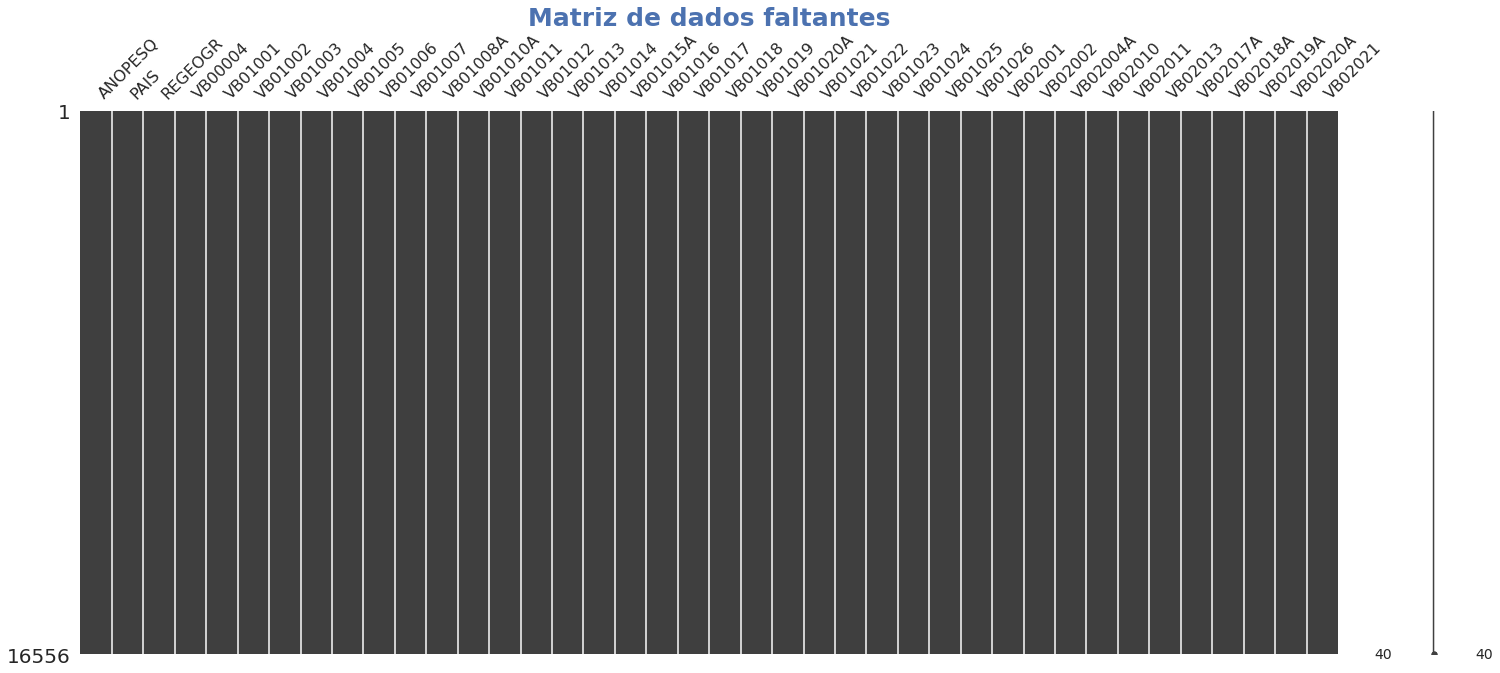

In [ ]:
#@title Dados faltantes
plt.figure()
msno.matrix(dados[dados.columns[0:40]])
plt.title('Matriz de dados faltantes', fontsize=25, fontweight='bold').set_color('b')
plt.show()

<Figure size 432x288 with 0 Axes>

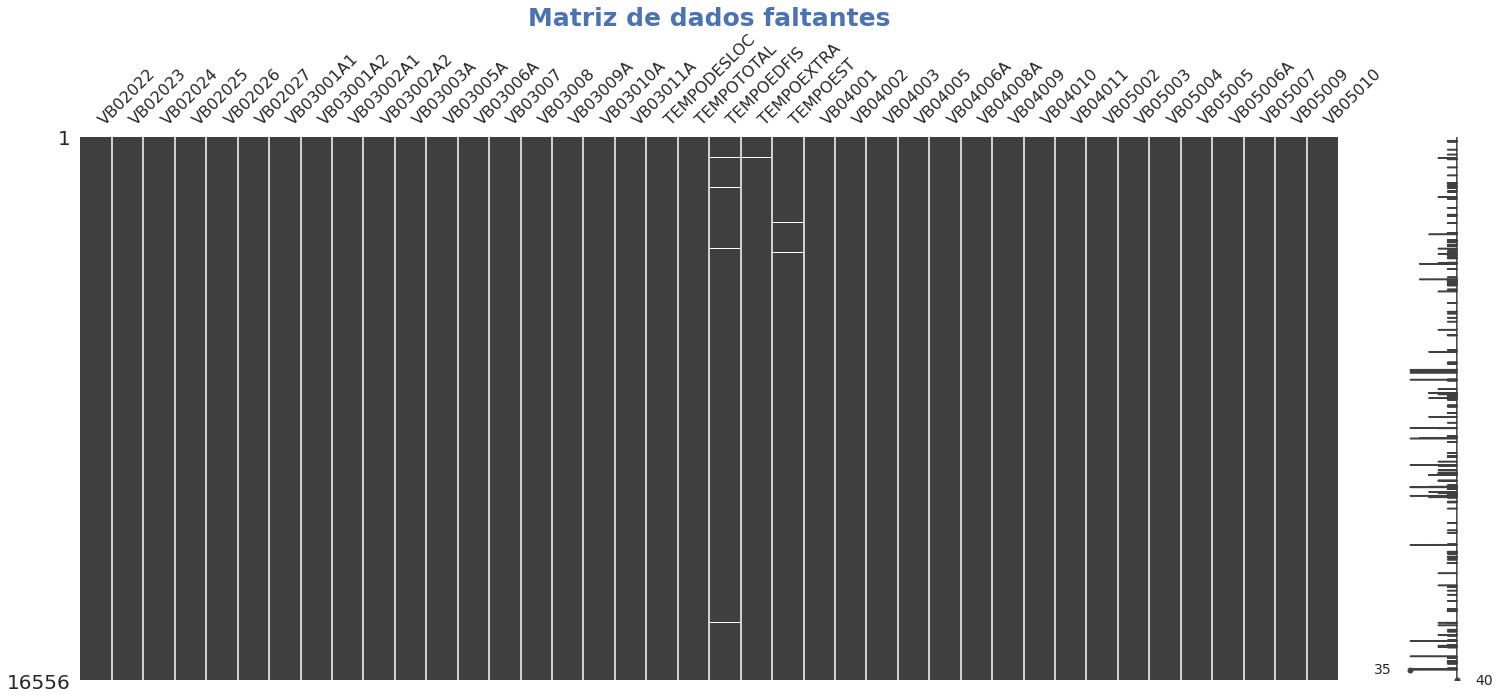

In [ ]:
plt.figure()
msno.matrix(dados[dados.columns[40:80]])
plt.title('Matriz de dados faltantes', fontsize=25, fontweight='bold').set_color('b')
plt.show()

<Figure size 432x288 with 0 Axes>

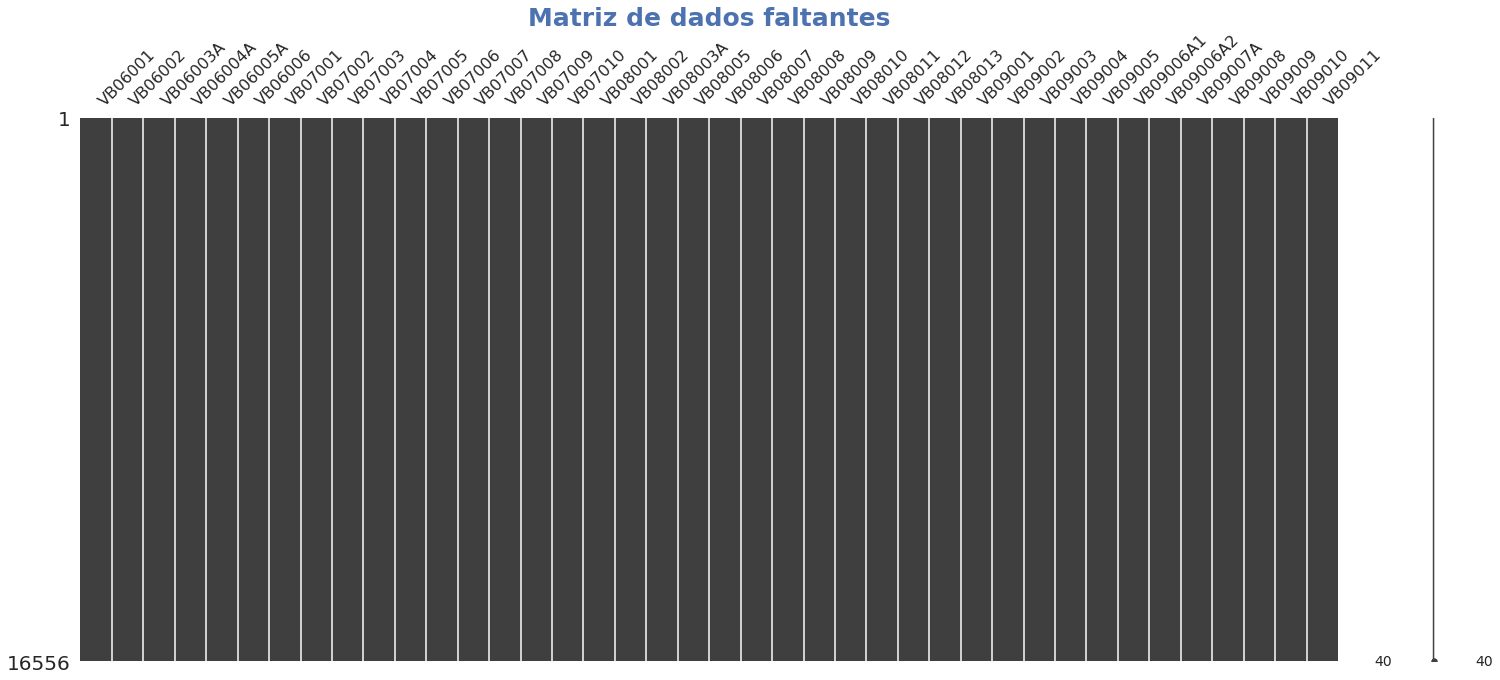

In [ ]:
plt.figure()
msno.matrix(dados[dados.columns[80:120]])
plt.title('Matriz de dados faltantes', fontsize=25, fontweight='bold').set_color('b')
plt.show()

<Figure size 432x288 with 0 Axes>

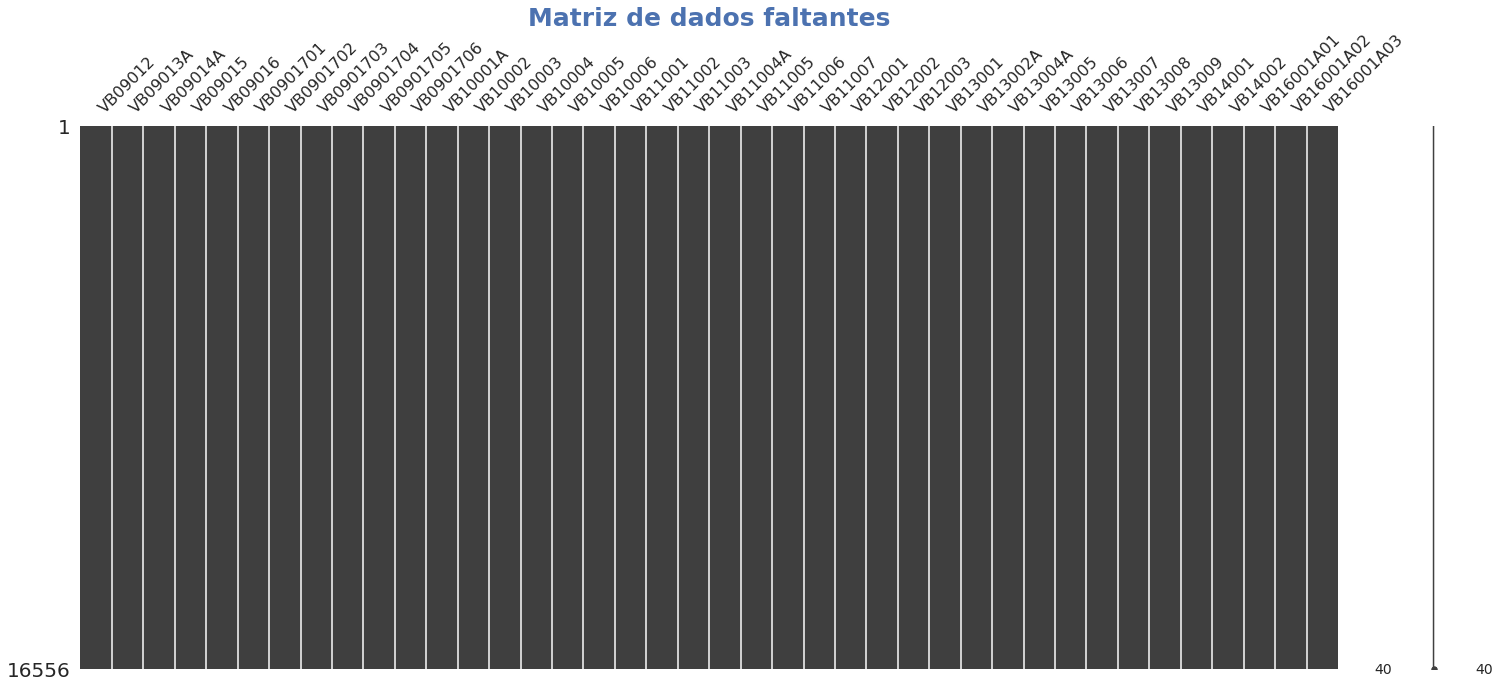

In [ ]:
plt.figure()
msno.matrix(dados[dados.columns[120:160]])
plt.title('Matriz de dados faltantes', fontsize=25, fontweight='bold').set_color('b')
plt.show()

<Figure size 432x288 with 0 Axes>

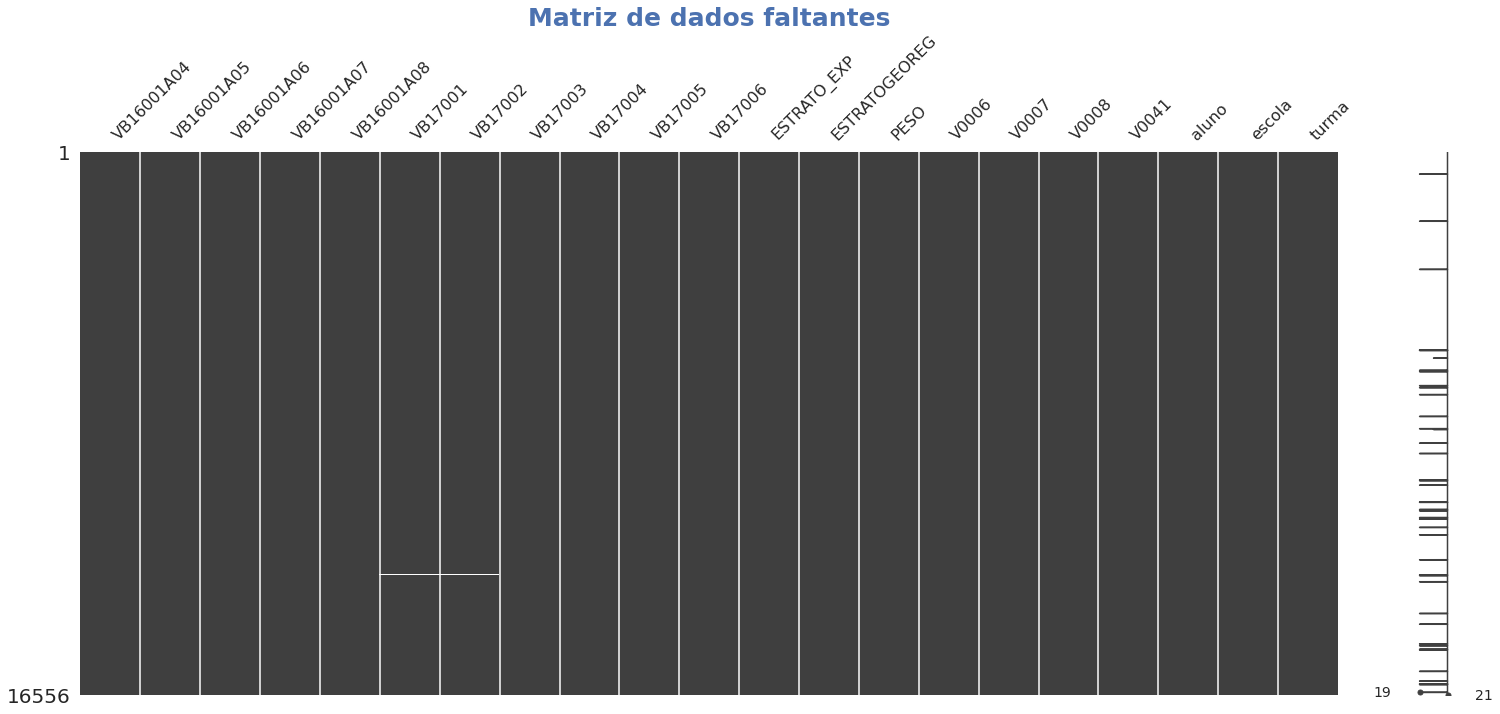

In [ ]:
plt.figure()
msno.matrix(dados[dados.columns[160:181]])
plt.title('Matriz de dados faltantes', fontsize=25, fontweight='bold').set_color('b')
plt.show()

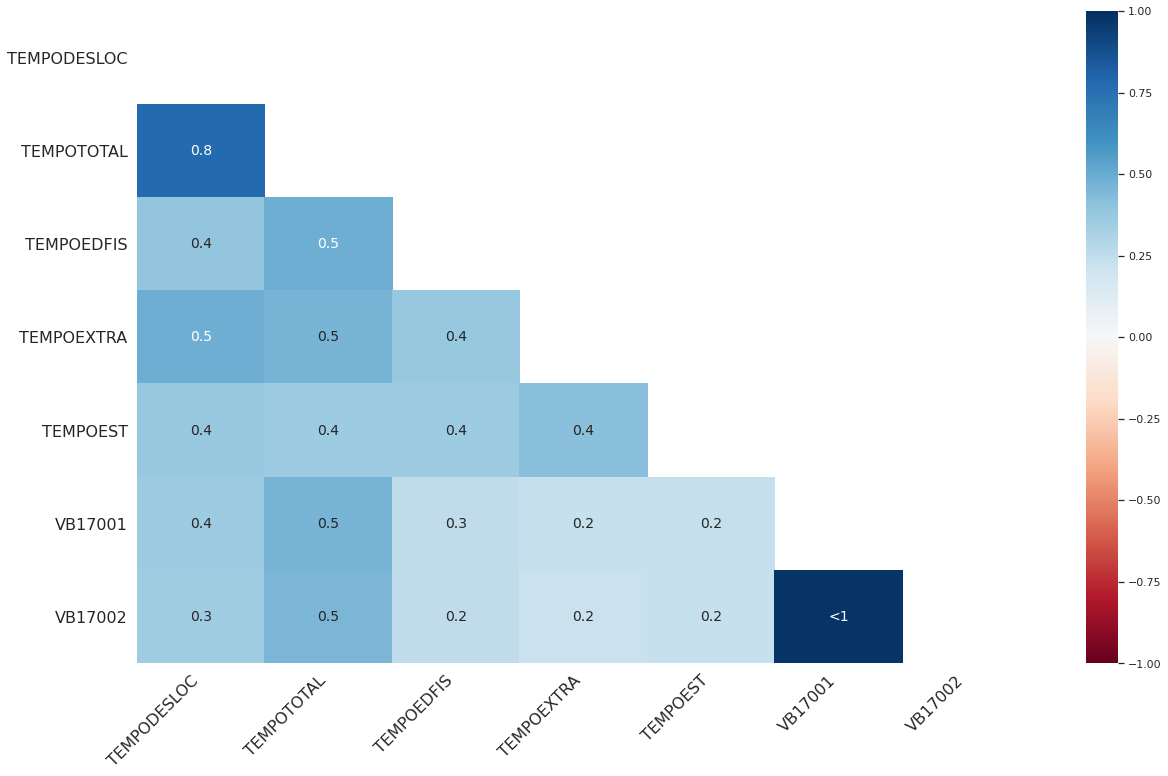

In [ ]:
msno.heatmap(dados)

Visto que dessas colunas com valores nulos apenas a VB17001: "Qual é o peso do(a) aluno(a)?" e a VB17002: "Qual é a altura do(a) aluno(a)?" serão utilizadas em minha análise, ignorarei as demais colunas com dados faltantes.

In [ ]:
#@title Tratando os dados faltantes

In [ ]:
print(f'A coluna VB17001: \n\"{dic_pense["VB17001"]}\" \nPossui {dados["VB17001"].isnull().sum()} dados nulos')

A coluna VB17001: 
"Qual é o peso do(a) aluno(a)?" 
Possui 45 dados nulos


In [ ]:
print(f'A coluna VB17002: \n\"{dic_pense["VB17002"]}\" \nPossui {dados["VB17002"].isnull().sum()} dados nulos')

A coluna VB17002: 
"Qual é a altura do(a) aluno(a)?" 
Possui 47 dados nulos


De forma a não interferir demais na análise subtituirei os dados faltantes dessas duas colunas pela média da coluna.

In [ ]:
dados['VB17002'] = dados["VB17002"].fillna(dados['VB17002'].mean())

In [ ]:
dados['VB17001'] = dados["VB17001"].fillna(dados['VB17001'].mean())

## **06 - Exploração inicial da base de dados**
***
***

In [ ]:
#Checando se os dados são todos de 2015
dados['ANOPESQ'].unique()

array([2015])

In [ ]:
#Checando se os dados são apenas do Brasil
dados['PAIS'].unique()

array([76])

In [ ]:
#@title Tamanho da base de dados
print(f'O dataset PeNSE_2015 amostra2 possui {dados.shape[0]} registros e {dados.shape[1]} colunas')

O dataset PeNSE_2015 amostra2 possui 16556 registros e 181 colunas


In [ ]:
#Criando função para a geração de dataframe de distribuição de frequências
def dist_freq_df(dado, dic, titulo_index):
  frequencia = dado.value_counts()
  percentual = dado.value_counts(normalize=True)*100

  dist_freq = pd.DataFrame({'Registros':frequencia, '[%]': percentual}).sort_index()
  dist_freq.rename(index=dic, inplace=True)
  dist_freq.rename_axis(titulo_index, inplace=True)
  return dist_freq

In [ ]:
#@title Registros por região

In [ ]:
regioes = {1: 'Norte', 2: 'Nordeste', 3: 'Sudeste', 4: 'Sul', 5: 'Centro-Oeste'}

dist_freq_df(dados['REGEOGR'], regioes, 'Regiões')

,Registros,[%]
Regiões,,
Norte,3188,19.26
Nordeste,3465,20.93
Sudeste,3276,19.79
Sul,3207,19.37
Centro-Oeste,3420,20.66


Os registros por região estão bem equilibrados se pensarmos de forma absoluta, porém de forma relativa regiões mais populosas, como o Sudeste, estão defasadas.

In [ ]:
#@title Registros por sexo

In [ ]:
#Criando o dicionário de sexo
dic_sexo = {1: 'Masculino', 2: 'Feminino'}

#Criando o dataframe dos registros por sexo
dist_freq_df(dados['VB01001'], dic_sexo, 'Sexo')

,Registros,[%]
Sexo,,
Masculino,8287,50.05
Feminino,8269,49.95


Os registros por sexo estão bastante equilibrados.

In [ ]:
#@title Registros por raça/cor

In [ ]:
#Criando o dicionário de raça/cor
dic_raca = {1: 'Branca', 
            2: 'Preta',
            3: 'Amarela',
            4: 'Parda',
            5: 'Indígena',
            99: 'Não informado'}

#Criando o dataframe dos registros por raça/cor
dist_freq_df(dados['VB01002'], dic_raca, 'Raça')

,Registros,[%]
Raça,,
Branca,6575,39.71
Preta,1939,11.71
Amarela,712,4.30
Parda,6726,40.63
Indígena,581,3.51
Não informado,23,0.14


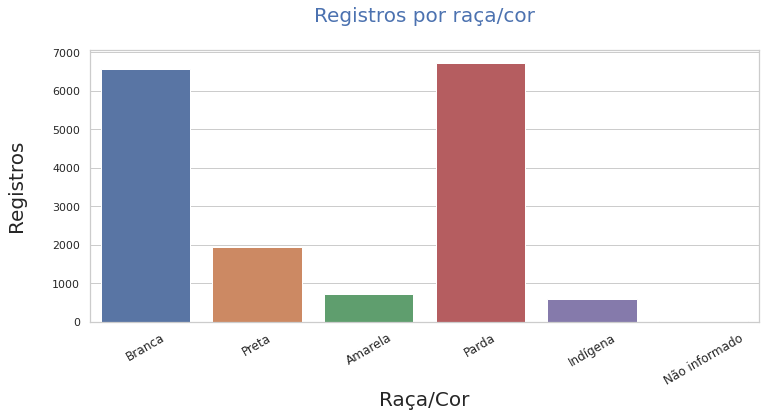

In [ ]:
#Criando o gráfico de barras
plt.figure(figsize=(12,5))
ax = sns.barplot(data = dados, x=dados['VB01002'].value_counts().sort_index().rename(index=dic_raca).index, y=dados['VB01002'].value_counts().sort_index())
plt.title('Registros por raça/cor\n', fontsize=20).set_color('b')
plt.xticks(rotation=30, fontsize=12)
plt.xlabel('Raça/Cor', fontsize=20)
plt.ylabel('Registros\n', fontsize=20)
plt.show()

Os registros por raça/cor estão desequilibrados numa análise absoluta, porém estão próximas da proporção da população brasileira.

In [ ]:
#@title Registros por idade

In [ ]:
#Criando o dicionário de idades
dic_idade = {11: '11 ou menos',
             12: '12 anos',
             13: '13 anos',
             14: '14 anos',
             15: '15 anos',
             16: '16 anos',
             17: '17 anos',
             18: '18 anos',
             19: '19 ou mais'}

#Criando o dataframe dos registros por idade
dist_freq_df(dados['VB01003'], dic_idade, 'Idade')

,Registros,[%]
Idade,,
11 ou menos,2072,12.52
12 anos,2634,15.91
13 anos,2561,15.47
14 anos,2133,12.88
15 anos,2425,14.65
16 anos,2270,13.71
17 anos,1537,9.28
18 anos,563,3.40
19 ou mais,361,2.18


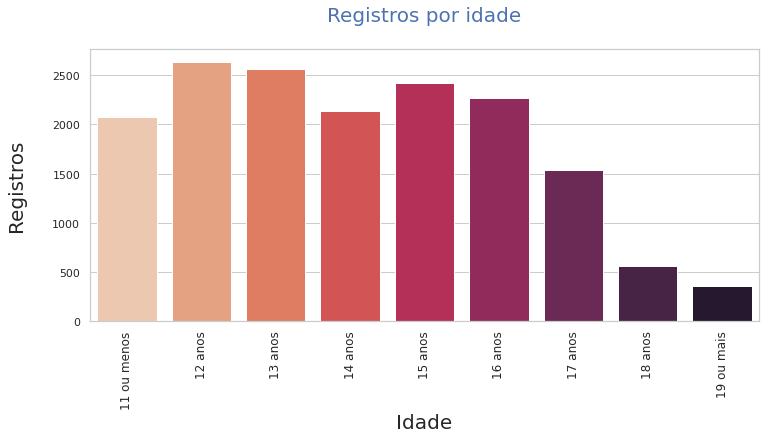

In [ ]:
#Criando o gráfico de barras
plt.figure(figsize=(12,5))
ax = sns.barplot(data = dados, x=dados['VB01003'].value_counts().sort_index().rename(index=dic_idade).index, y=dados['VB01003'].value_counts().sort_index(), palette=sns.color_palette('rocket_r', 9))
plt.title('Registros por idade\n', fontsize=20).set_color('b')
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Idade', fontsize=20)
plt.ylabel('Registros\n', fontsize=20)
plt.show()

Os registros por idade estão equilibrados se pensarmos que a pesquisa é feita com base em alunos do 6º ao 9º ano do ensino fundamental (de 10 a 15 anos) e 1º ao 3º ano do ensino médio (de 14 a 18 anos). O números baixos  de 17 anos em diante podem ser explicados por uma maior evasão escolar no ensino médio, porém essa hipótese não será analisada por não ser objetivo do estudo.

In [ ]:
#@title Registros por dependência administrativa da escola

In [ ]:
#Criando o dicionário de dependência administrativa das escolas
dic_dep_adm = {1: 'Escola pública', 2: 'Escola privada'}

#Criando o dataframe dos registros por sexo
dist_freq_df(dados['V0007'], dic_dep_adm, 'Dependência administrativa')

,Registros,[%]
Dependência administrativa,,
Escola pública,12381,74.78
Escola privada,4175,25.22


Quase três quartos dos registros são de escolas públicas. Uma constatação em que não se pode tirar maiores conclusões, uma vez que não se sabe, através desta base de dados, a proporção real das dependências administrativas das escolas no país.

## **07 - Entendendo o quadro geral das drogas lícitas e ilícitas na base de dados**
***
***

In [ ]:
#Criando dicionário de respostas Sim/Não
dic_sn = {1: 'Sim', 2: 'Não', 99: 'Não informado', -1: 'Pulo no questionário'}

In [ ]:
#Criando labels para as idades
label_idade = ['7 ou menos', '8 anos', '9 anos', '10 anos', '11 anos', '12 anos', '13 anos',
                      '14 anos', '15 anos', '16 anos', '17 anos', '18 ou mais']

### **07.1 - Drogas lícitas**
***

In [ ]:
#@title Contato com drogas lícitas

Aqui utilizarei as seguintes questões:

In [ ]:
#Contato com cigarros
dados_cigarro = dados["VB04001"].value_counts().reindex(index = [1, 2, 99, -1]).rename(index=dic_sn)
pct_cigarro = '{:.2f}'.format((dados["VB04001"].value_counts()[1]/dados["VB04001"].value_counts().sum())*100)

print(f'{dic_pense["VB04001"]} \n\n{dados_cigarro} \n\nA porcentagem de crianças/adolescentes que declararam já terem fumado cigarro é de {pct_cigarro}%.')

Alguma vez na vida, você já fumou cigarro, mesmo uma ou duas tragadas?  

Sim                     2803
Não                     9030
Não informado             17
Pulo no questionário    4706
Name: VB04001, dtype: int64 

A porcentagem de crianças/adolescentes que declararam já terem fumado cigarro é de 16.93%.


In [ ]:
#Contato com bebida alcoólica
dados_bebida = dados["VB05002"].value_counts().reindex(index = [1, 2, 99, -1]).rename(index=dic_sn)
pct_bebida = '{:.2f}'.format((dados["VB05002"].value_counts()[1]/dados["VB05002"].value_counts().sum())*100)

print(f'{dic_pense["VB05002"]} \n\n{dados_bebida} \n\nA porcentagem de crianças/adolescentes que declararam já terem ingerido bebida alcoólica é de {pct_bebida}%.')

Alguma vez na vida você tomou uma dose de bebida alcoólica? (Uma dose equivale a uma lata de cerveja ou uma taça de vinho ou uma dose de cachaça ou uísque etc) 

Sim                     7078
Não                     4747
Não informado             25
Pulo no questionário    4706
Name: VB05002, dtype: int64 

A porcentagem de crianças/adolescentes que declararam já terem ingerido bebida alcoólica é de 42.75%.


In [ ]:
#@title Idade do primeiro contato com drogas lícitas

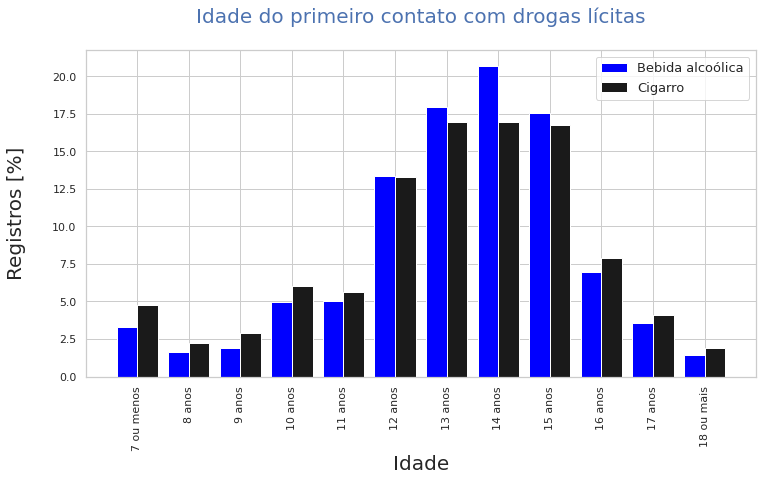

In [ ]:
plt.figure(figsize=(12,6))
w=0.4

bebida_sim_idade = (dados.query('VB05002 == 1')['VB05003'].value_counts(normalize=True)*100).sort_index()
cigarro_sim_idade = (dados.query('VB04001 == 1')['VB04002'].value_counts(normalize=True)*100).sort_index()

bar1 = np.arange(len(bebida_sim_idade[1:-1]))
bar2 = [i+w for i in bar1]

plt.bar(bar1, bebida_sim_idade[1:-1], w, label='Bebida alcoólica', color='blue')
plt.bar(bar2, cigarro_sim_idade[:-1], w, label='Cigarro', color='k')
plt.xticks(bar1+w/2, label_idade, rotation=90)
plt.xlabel('Idade', fontsize=20)
plt.ylabel('Registros [%]\n', fontsize=20)
plt.title('Idade do primeiro contato com drogas lícitas\n', fontsize=20).set_color('b')

plt.legend(fontsize=13)
plt.show()

Na análise dos gráficos chama a atenção o grande número de crianças/adolescentes que tiveram seu primeiro contato com drogas lícitas antes dos 7 anos, principalmente o cigarro. A partir dos 12 anos o registro cresce bastante tendo seu pico dos 13 aos 15 anos.

In [ ]:
#@title Usuários ativos de drogas lícitas

Considerarei fumantes ativos e consumidores de alcool ativos aqueles que fumaram pelo menos 1 cigarro e beberam pelo menos uma dose de bebida alcóolica, respectivamente, nos últimos 30 dias. Terei uma margem de erro nesta análise uma vez que algumas crianças/adolescentes podem ter fumado/bebido pela primeira vez nos últimos 30 dias, porém este número é provavelmente bem baixo, considerando a razão entre 30 dias e o número total de vida desses alunos.

In [ ]:
#Fumantes
fumantes_ativos = dados['VB04003'].value_counts()[2:-1].sum()
ja_fumaram = dados.query('VB04001 == 1')['VB04001'].sum()
relacao_fumante = (fumantes_ativos/ja_fumaram)*100

#Consumidores de álcool
alcool_ativos = dados['VB05004'].value_counts()[2:-1].sum()
ja_beberam = dados.query('VB05002 == 1')['VB05002'].sum()
relacao_alcool = (alcool_ativos/ja_beberam)*100

fumante_alcool = {'Já consumiram':[ja_fumaram, ja_beberam],
                  'Ativos': [fumantes_ativos, alcool_ativos],
                  'Relação [%]': [relacao_fumante, relacao_alcool],
                  'Lícitos': ['Cigarro', 'Bebida alcoólica']}

fumante_alcool_df = pd.DataFrame(fumante_alcool)
fumante_alcool_df.set_index('Lícitos', inplace=True)
fumante_alcool_df

,Já consumiram,Ativos,Relação [%]
Lícitos,,,
Cigarro,2803,811,28.93
Bebida alcoólica,7078,3515,49.66


### **07.2 - Drogas ilícitas**
***

In [ ]:
#@title Contato com drogas ilícitas

Aqui utilizarei as seguintes questões:

In [ ]:
dados_drogas = dados["VB06001"].value_counts().reindex(index = [1, 2, 99, -1]).rename(index=dic_sn)
pct_drogas = '{:.2f}'.format((dados["VB06001"].value_counts()[1]/dados["VB06001"].value_counts().sum())*100)

print(f'{dic_pense["VB06001"]} \n\n{dados_drogas} \n\nA porcentagem de crianças/adolescentes que declararam já terem utilizado alguma droga ilícita é de {pct_drogas}%.')

Alguma vez na vida, você já usou alguma droga-como: maconha, cocaína, crack, loló, lança-perfume, ecstasy, oxy, etc? 

Sim                      1439
Não                     10384
Não informado              27
Pulo no questionário     4706
Name: VB06001, dtype: int64 

A porcentagem de crianças/adolescentes que declararam já terem utilizado alguma droga ilícita é de 8.69%.


In [ ]:
pct_drogas_nao_informado = '{:.2f}'.format((dados["VB06001"].value_counts()[[-1, 99]].sum()/dados["VB06001"].value_counts().sum())*100)
print(f'Na pergunta sobre contato com alguma substância ilícita os registros indefinidos \n(\"Não informado\", \"Pulo no questionário\") são de {pct_drogas_nao_informado}%.')

Na pergunta sobre contato com alguma substância ilícita os registros indefinidos 
("Não informado", "Pulo no questionário") são de 28.59%.


O número elevado de registros indefinidos em todas as questões relacionadas às drogas lícitas e ilícitas pode ser por desconfiança no anonimato da pesquisa. Utilizarei, na análise, os dados concretos ("Sim" e "Não").

In [ ]:
#@title Idade do primeiro contato com drogas ilícitas

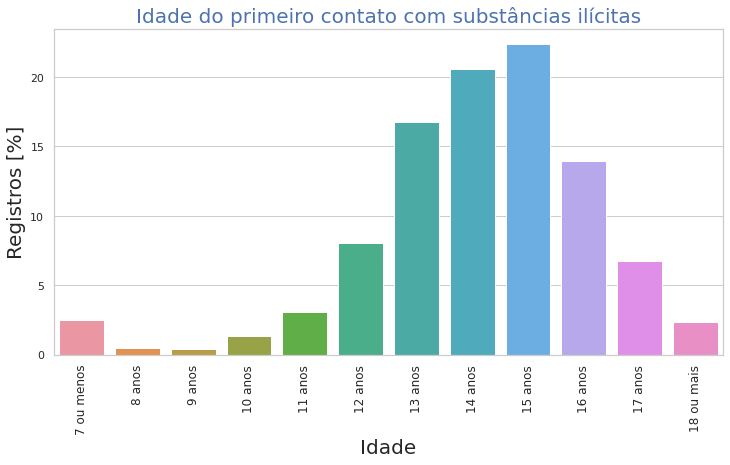

In [ ]:
#Definindo os dados
drogas_sim_idade = (dados.query('VB06001 == 1')['VB06002'].value_counts(normalize=True)*100).sort_index()

#Plotagem da idade em que a criança/adolescente tiveram seu primeiro contato com drogas
plt.figure(figsize=(12,6))
ax = sns.barplot(data=dados, x=drogas_sim_idade.index[:-1], y=drogas_sim_idade[:-1])
plt.title('Idade do primeiro contato com substâncias ilícitas', fontsize=20).set_color('b')
ax.set_xticklabels(label_idade, rotation = 90, fontsize=12)
ax.set_xlabel('Idade', fontsize=20)
ax.set_ylabel('Registros [%]', fontsize=20)

plt.show()

In [ ]:
#@title Usuários ativos de drogas ilícitas

In [ ]:
#Usuários de drogas ilicitas
usuarios_ativos = dados['VB06003A'].value_counts()[2:-1].sum()
ja_usaram = dados.query('VB06001 == 1')['VB06001'].sum()
relacao_usuarios = (usuarios_ativos/ja_usaram)*100

#Consumidores de maconha
maconha_ativos = dados['VB06004A'].value_counts()[2:-1].sum()
ja_maconha = dados.query('VB06004A == 1')['VB06004A'].sum()
relacao_maconha = (maconha_ativos/ja_maconha)*100

#Consumidores de crack
crack_ativos = dados['VB06005A'].value_counts()[2:-1].sum()
ja_crack = dados.query('VB06005A == 1')['VB06005A'].sum()
relacao_crack = (crack_ativos/ja_crack)*100

usuarios = {'Já consumiram':[ja_usaram, ja_maconha, ja_crack],
            'Ativos': [usuarios_ativos, maconha_ativos, crack_ativos],
            'Relação [%]': [relacao_usuarios, relacao_maconha, relacao_crack],
            'Ilícitos': ['Drogas ilícitas', 'Maconha', 'Crack']}

usuarios_df = pd.DataFrame(usuarios)
usuarios_df.set_index('Ilícitos', inplace=True)
usuarios_df

,Já consumiram,Ativos,Relação [%]
Ilícitos,,,
Drogas ilícitas,1439,634,44.06
Maconha,807,627,77.70
Crack,1361,70,5.14


## **08 - Análise de ganchos do ambiente familiar**
***
***

Neste tópico analisarei quais as relações do ambiente familiar com o uso de drogas ilícitas. Será considerado a presença dos pais,  violência e abuso sexual doméstico e aspectos indiretos de uma educação mais "rígida" (atenção dos pais e tipo de alimentação).

### **08.1 - Presença dos pais**
***

A seguir utilizarei as seguintes questões:

In [ ]:
dados_mae = dados["VB01006"].value_counts().rename(index=dic_sn)
porcent_sem_mae = '{:.2f}'.format((dados["VB01006"].value_counts()[2]/dados["VB01006"].value_counts().sum())*100)

print(f'{dic_pense["VB01006"]} \n\n{dados_mae} \n\nA porcentagem de crianças/adolescentes que não moram com a mãe é de {porcent_sem_mae}%')


Você mora com sua mãe? 

Sim              14679
Não               1866
Não informado       11
Name: VB01006, dtype: int64 

A porcentagem de crianças/adolescentes que não moram com a mãe é de 11.27%


In [ ]:
dados_pai = dados["VB01007"].value_counts().rename(index=dic_sn)
porcent_sem_pai = '{:.2f}'.format((dados["VB01007"].value_counts()[2]/dados["VB01007"].value_counts().sum())*100)

print(f'{dic_pense["VB01007"]} \n\n{dados_pai} \n\nA porcentagem de crianças/adolescentes que não moram com o pai é de {porcent_sem_pai}%')

Você mora com seu pai? 

Sim              10460
Não               6081
Não informado       15
Name: VB01007, dtype: int64 

A porcentagem de crianças/adolescentes que não moram com o pai é de 36.73%


Apesar de saber que muitos casos de crianças que não moram com os pais não são necessariamente abandono dos pais, assusta ver a alta porcentagem de crianças que não tem a presença do pai em casa. Muitos desses casos são algo semelhante a um "aborto" paternal. Pais que não querem assumir a responsabilidade de ter um filho e simplesmente somem da vida da criança.

A partir dos dados da presença dos pais separarei os registros em 4 grupos:

- Com a presença de pai e mãe
- Com a presença apenas da mãe
- Com a presença apenas do pai
- Sem a presença de pai nem mãe

In [ ]:
com_pai_mae = dados.query('VB01006 == 1').query('VB01007 == 1')
sem_pai = dados.query('VB01006 == 1').query('VB01007 == 2')
sem_mae = dados.query('VB01006 == 2').query('VB01007 == 1')
sem_pai_mae = dados.query('VB01006 == 2').query('VB01007 == 2')

In [ ]:
porcent_pai_mae = '{:.2f}'.format((com_pai_mae.shape[0]/dados.shape[0])*100)
porcent_sem_pai = '{:.2f}'.format((sem_pai.shape[0]/dados.shape[0])*100)
porcent_sem_mae = '{:.2f}'.format((sem_mae.shape[0]/dados.shape[0])*100)
porcent_sem_pai_mae = '{:.2f}'.format((sem_pai_mae.shape[0]/dados.shape[0])*100)


In [ ]:
dic_pai_mae = {'Registros': [com_pai_mae.shape[0], sem_pai.shape[0], sem_mae.shape[0], sem_pai_mae.shape[0]],
               '[%]': [porcent_pai_mae, porcent_sem_pai, porcent_sem_mae, porcent_sem_pai_mae],
               'Situação': ['Mora com pai e mãe', 'Mora apenas com a mãe', 'Mora apenas com o pai', 'Mora sem o pai nem a mãe']}
df_pai_mae = pd.DataFrame(dic_pai_mae)
df_pai_mae.set_index('Situação', inplace=True)
df_pai_mae

,Registros,[%]
Situação,,
Mora com pai e mãe,9689,58.52
Mora apenas com a mãe,4983,30.10
Mora apenas com o pai,769,4.64
Mora sem o pai nem a mãe,1096,6.62


<font color='blue'> Hipótese 08.1.1:</font> A ausência do pai e/ou da mãe aumentam as chances de uso de drogas ilícitas.

In [ ]:
#Já usaram X situação Pai Mãe
usu_com_pai_mae = com_pai_mae.query('VB06001 == 1')['VB06001'].sum()
usu_sem_pai = sem_pai.query('VB06001 == 1')['VB06001'].sum()
usu_sem_mae = sem_mae.query('VB06001 == 1')['VB06001'].sum()
usu_sem_pai_mae = sem_pai_mae.query('VB06001 == 1')['VB06001'].sum()
serie_usaram = pd.Series([usu_com_pai_mae, usu_sem_pai, usu_sem_mae, usu_sem_pai_mae], index=df_pai_mae.index)

#Usuários ativos X situação Pai Mãe
usu_ativos_com_pai_mae = com_pai_mae['VB06003A'].value_counts()[2:-1].sum()
usu_ativos_sem_pai = sem_pai['VB06003A'].value_counts()[2:-1].sum()
usu_ativos_sem_mae = sem_mae['VB06003A'].value_counts()[2:-1].sum()
usu_ativos_sem_pai_mae = sem_pai_mae['VB06003A'].value_counts()[2:-1].sum()
serie_usuario = pd.Series([usu_ativos_com_pai_mae, usu_ativos_sem_pai, 
                           usu_ativos_sem_mae, usu_ativos_sem_pai_mae], index=df_pai_mae.index)

#Usuários ativos maconha X situação Pai Mãe
usu_maconha_com_pai_mae = com_pai_mae['VB06004A'].value_counts()[2:-1].sum()
usu_maconha_sem_pai = sem_pai['VB06004A'].value_counts()[2:-1].sum()
usu_maconha_sem_mae = sem_mae['VB06004A'].value_counts()[2:-1].sum()
usu_maconha_sem_pai_mae = sem_pai_mae['VB06004A'].value_counts()[2:-1].sum()
serie_maconha = pd.Series([usu_maconha_com_pai_mae, usu_maconha_sem_pai, 
                           usu_maconha_sem_mae, usu_maconha_sem_pai_mae], index=df_pai_mae.index)

#Usuários ativos crack X situação Pai Mãe
usu_crack_com_pai_mae = com_pai_mae['VB06005A'].value_counts()[2:-1].sum()
usu_crack_sem_pai = sem_pai['VB06005A'].value_counts()[2:-1].sum()
usu_crack_sem_mae = sem_mae['VB06005A'].value_counts()[2:-1].sum()
usu_crack_sem_pai_mae = sem_pai_mae['VB06005A'].value_counts()[2:-1].sum()
serie_crack = pd.Series([usu_crack_com_pai_mae, usu_crack_sem_pai, 
                           usu_crack_sem_mae, usu_crack_sem_pai_mae], index=df_pai_mae.index)

In [ ]:
#Dataframe de registros X já tiveram contato com drogas ilícitas
df_pai_mae_usu = df_pai_mae[['Registros']]
df_pai_mae_usu['Já usaram drogas ilícitas'] = serie_usaram
df_pai_mae_usu['Percentual [%]'] = (df_pai_mae_usu['Já usaram drogas ilícitas'] / df_pai_mae_usu['Registros'])*100
df_pai_mae_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
Mora com pai e mãe,9689,657,6.78
Mora apenas com a mãe,4983,531,10.66
Mora apenas com o pai,769,95,12.35
Mora sem o pai nem a mãe,1096,154,14.05


In [ ]:
razao_pct_pai_mae_usu = '{:.2f}'.format(df_pai_mae_usu.iloc[3][2] / df_pai_mae_usu.iloc[0][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando não mora nem com pai nem com a mãe é {razao_pct_pai_mae_usu} vezes maior do que aquelas que moram com ambos.')

A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando não mora nem com pai nem com a mãe é 2.07 vezes maior do que aquelas que moram com ambos.


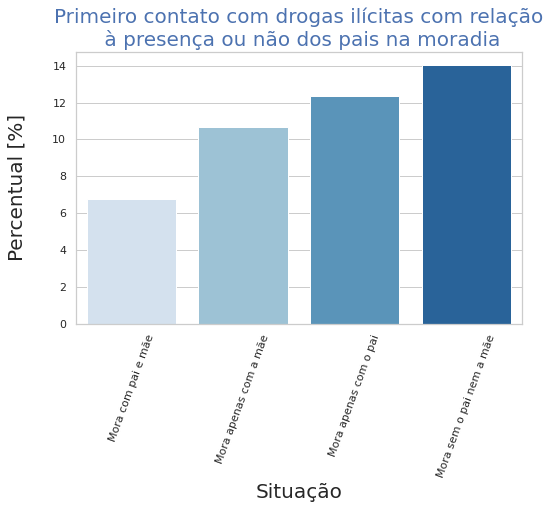

In [ ]:
#Gráfico do percentual das crianças/adolescentes que tiveram contato com drogas ilícitas
plt.figure(figsize=(8,5))
sns.barplot(data=df_pai_mae_usu, x=df_pai_mae_usu.index, y='Percentual [%]', palette='Blues')
plt.xticks(rotation=70)
plt.xlabel('Situação',fontsize=20)
plt.ylabel('Percentual [%]\n', fontsize=20)
plt.title('Primeiro contato com drogas ilícitas com relação\n à presença ou não dos pais na moradia', fontsize=20).set_color('b')
plt.show()

In [ ]:
#Dataframe de registros X usuários ativos de drogas ilícitas
df_pai_mae_ativos = df_pai_mae[['Registros']]
df_pai_mae_ativos['Usuários ativos de drogas ilícitas'] = serie_usuario
df_pai_mae_ativos['Percentual [%]'] = (df_pai_mae_ativos['Usuários ativos de drogas ilícitas'] / df_pai_mae_ativos['Registros'])*100
df_pai_mae_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
Mora com pai e mãe,9689,294,3.03
Mora apenas com a mãe,4983,234,4.70
Mora apenas com o pai,769,38,4.94
Mora sem o pai nem a mãe,1096,56,5.11


In [ ]:
razao_pct_pai_mae_ativos = '{:.2f}'.format(df_pai_mae_ativos.iloc[3][2] / df_pai_mae_ativos.iloc[0][2])
print(f'A chance de uma criança/adolescente ser usuário ativo de drogas \nilícitas quando não mora nem com pai nem com a mãe é {razao_pct_pai_mae_ativos} vezes maior do que aquelas que moram com ambos.')

A chance de uma criança/adolescente ser usuário ativo de drogas 
ilícitas quando não mora nem com pai nem com a mãe é 1.68 vezes maior do que aquelas que moram com ambos.


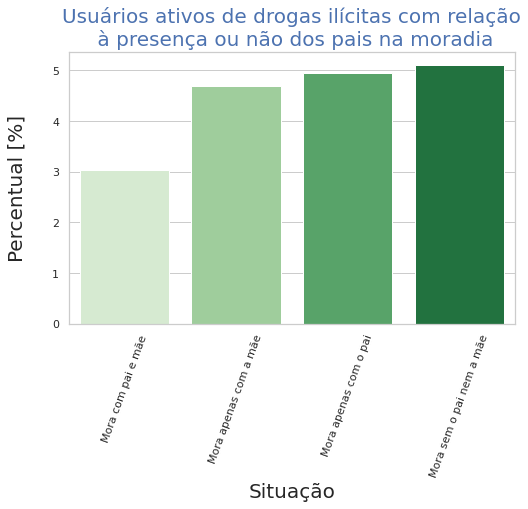

In [ ]:
#Gráfico do percentual das crianças/adolescentes que são usuários ativos de drogas ilícitas
plt.figure(figsize=(8,5))
sns.barplot(data=df_pai_mae_ativos, x=df_pai_mae_ativos.index, y='Percentual [%]', palette='Greens')
plt.xticks(rotation=70)
plt.xlabel('Situação',fontsize=20)
plt.ylabel('Percentual [%]\n', fontsize=20)
plt.title('Usuários ativos de drogas ilícitas com relação\n à presença ou não dos pais na moradia', fontsize=20).set_color('b')
plt.show()

<font color='red'> Conclusão da hipótese 08.1.1:</font> Conforme esperado, a ausência do pai e/ou da mãe aumenta as chances de contato com drogas ilícitas, e a ausência de apenas 1 deles já gera um grande aumento, porém a ausência da mãe pesa mais do que a ausência do pai.

In [ ]:
#Dataframe de já tiveram contato com drogas ilícitas X usuários ativos
df_pai_mae_ativo = df_pai_mae_usu[['Já usaram drogas ilícitas']]
df_pai_mae_ativo['Usuários ativos de drogas ilícitas'] = serie_usuario
df_pai_mae_ativo['Percentual [%]'] = (df_pai_mae_ativo['Usuários ativos de drogas ilícitas'] / df_pai_mae_ativo['Já usaram drogas ilícitas'])*100
df_pai_mae_ativo

,Já usaram drogas ilícitas,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
Mora com pai e mãe,657,294,44.75
Mora apenas com a mãe,531,234,44.07
Mora apenas com o pai,95,38,40.00
Mora sem o pai nem a mãe,154,56,36.36


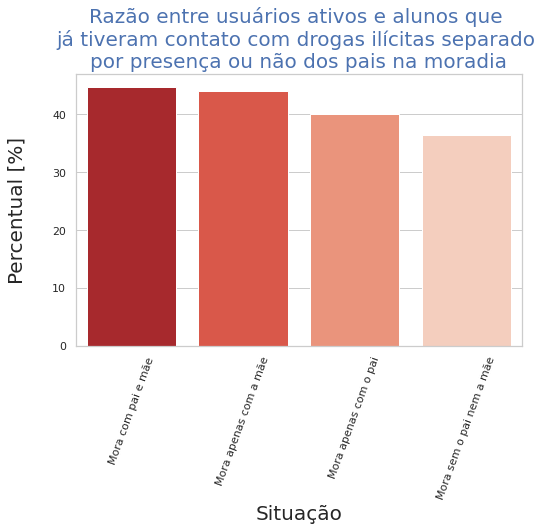

In [ ]:
#Gráfico do percentual das crianças/adolescentes que são usuários ativos de drogas ilícitas
plt.figure(figsize=(8,5))
sns.barplot(data=df_pai_mae_ativo, x=df_pai_mae_ativo.index, y='Percentual [%]', palette='Reds_r')
plt.xticks(rotation=70)
plt.xlabel('Situação',fontsize=20)
plt.ylabel('Percentual [%]\n', fontsize=20)
plt.title('Razão entre usuários ativos e alunos que \njá tiveram contato com drogas ilícitas separado \npor presença ou não dos pais na moradia', fontsize=20).set_color('b')
plt.show()

Interessante notar neste último gráfico que, uma vez em contato com drogas ilícitas, as crianças/adolescentes com presença de pai e mãe na moradia têm uma maior tendência a se tornarem consumidores ativos. Este resultado pode ser explicado pela necessidade de uma maior responsabilidade da criança/adolescente sem os pais, que, muitas vezes, precisam prover sustento para a casa e acabam tendo um maior "enriquecimento ambiental" no seu entorno.


### **08.2 - Envolvimento dos pais na educação dos filhos**
***

Neste tópico analisarei alguns pontos de envolvimento maior dos pais na educação dos filhos. 

Para evitar alguma distorção por presença/ausência dos pais na moradia dos filhos, utilizarei apenas os dados em que tanto o pai quanto a mãe moram na mesma casa das crianças/adolescentes. 

Outra consideração que farei, uma vez que a definiçãode pais presentes na educação dos filhos - através de um questionário voltado às crianças/adolescentes - é subjetiva, será a comparação de extremos.

In [ ]:
#Função para criação de dataframe de Registros 
def df_registros(sem, com, index_sem, index_com):
  total = sem.shape[0]+com.shape[0]
  dic = {'Registros': [sem.shape[0],
                       com.shape[0]],
         'Percentual [%]': [(sem.shape[0]/total)*100, 
                            (com.shape[0]/total)*100],
         'Situação':[index_sem, index_com]}
  df_dic = pd.DataFrame(dic)
  df_dic.set_index('Situação', inplace=True)
  return df_dic

In [ ]:
#Função para a geração de dataframe comparativo entre registros e casos de contato com drogas ilícitas
def df_sem_com_usu(df_registros, sem, com):
  sem_usu = sem[(sem['VB06001']==1)]['VB06001'].value_counts().sum()
  com_usu = com[(com['VB06001']==1)]['VB06001'].value_counts().sum()
  df_registros_sem_com_usu = df_registros[['Registros']]
  serie = pd.Series([sem_usu, com_usu], index=df_registros_sem_com_usu.index)
  df_registros_sem_com_usu['Já usaram drogas ilícitas'] = serie
  df_registros_sem_com_usu['Percentual [%]'] = (df_registros_sem_com_usu['Já usaram drogas ilícitas'] / df_registros_sem_com_usu['Registros'])*100
  return df_registros_sem_com_usu

In [ ]:
#Função para a geração de dataframe comparativo entre registros e casos de usuários ativos
def df_sem_com_ativos(df_registros, sem, com):
  sem_ativos = sem['VB06003A'].value_counts().sort_index()[2:-1].sum()
  com_ativos = com['VB06003A'].value_counts().sort_index()[2:-1].sum()
  df_registros_sem_com_ativos = df_registros[['Registros']]
  serie = pd.Series([sem_ativos, com_ativos], index=df_registros_sem_com_ativos.index)
  df_registros_sem_com_ativos['Usuários ativos de drogas ilícitas'] = serie
  df_registros_sem_com_ativos['Percentual [%]'] = (df_registros_sem_com_ativos['Usuários ativos de drogas ilícitas'] / df_registros_sem_com_ativos['Registros'])*100
  return df_registros_sem_com_ativos

In [ ]:
#@title Atenção dos pais

Neste tópico utilizarei os dados das questões 'VB07001' até 'VB07005', descritos abaixo. Como mencionado acima, utilizarei apenas os extremos que responderam tudo para o lado de "pais presentes na educação" ou "pais ausentes na educação", reduzindo bastante minha quantidade de dados, mas ao mesmo tempo, reduzindo resultados pouco representativos.

In [ ]:
print(f'Questão "VB07001": \n{dic_pense["VB07001"]}\n')
print(f'Questão "VB07002": \n{dic_pense["VB07002"]}\n')
print(f'Questão "VB07003": \n{dic_pense["VB07003"]}\n')
print(f'Questão "VB07004": \n{dic_pense["VB07004"]}\n')
print(f'Questão "VB07005": \n{dic_pense["VB07005"]}\n')

Questão "VB07001": 
NOS ÚLTIMOS 30 DIAS, em quantos dias você faltou às aulas ou à escola sem permissão dos seus pais ou responsáveis?

Questão "VB07002": 
NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis sabiam realmente o que você estava fazendo em seu tempo livre?

Questão "VB07003": 
NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis verificaram se os seus deveres de casa (lição de casa) foram feitos?

Questão "VB07004": 
NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis entenderam seus problemas e preocupações?

Questão "VB07005": 
NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis mexeram em suas coisas sem a sua concordância?



In [ ]:
#Separação da base de dados de crianças/adolescentes com pais presentes na educação
com_pais_presentes = com_pai_mae[(com_pai_mae['VB07001'] == 1) & (com_pai_mae['VB07002'] >= 4) & (com_pai_mae['VB07002'] != 99) & (com_pai_mae['VB07003'] >= 4) & (com_pai_mae['VB07003'] != 99) & (com_pai_mae['VB07004'] >= 4) & (com_pai_mae['VB07004'] != 99) & (com_pai_mae['VB07005'] >= 4) & (com_pai_mae['VB07005'] != 99)]
sem_pais_presentes = com_pai_mae[(com_pai_mae['VB07001'] >= 2) & (com_pai_mae['VB07001'] != 99) & (com_pai_mae['VB07002'] <= 2) & (com_pai_mae['VB07003'] <=2) & (com_pai_mae['VB07004'] <= 2) & (com_pai_mae['VB07005'] <= 2)]

In [ ]:
#Dataframe de registros
df_presente_ausente = df_registros(com_pais_presentes, sem_pais_presentes, 
                                   'Pais presentes na educação',
                                   'Pais ausentes na educação')
df_presente_ausente

,Registros,Percentual [%]
Situação,,
Pais presentes na educação,263,65.75
Pais ausentes na educação,137,34.25


In [ ]:
#Dataframe de comparativo de registros e crianças/adolescentes que já utilizaram drogas ilícitas
df_presente_ausente_usu = df_sem_com_usu(df_presente_ausente, com_pais_presentes, sem_pais_presentes)
df_presente_ausente_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
Pais presentes na educação,263,5,1.90
Pais ausentes na educação,137,32,23.36


In [ ]:
razao_pct_pre_aus_usu = '{:.2f}'.format(df_presente_ausente_usu.iloc[1][2] / df_presente_ausente_usu.iloc[0][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando os pais não são presentes na educação é {razao_pct_pre_aus_usu} vezes maior.')

A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando os pais não são presentes na educação é 12.29 vezes maior.


In [ ]:
#Dataframe de comparativo de registros e crianças/adolescentes usuários ativos drogas ilícitas
df_presente_ausente_ativos = df_sem_com_ativos(df_presente_ausente, com_pais_presentes, sem_pais_presentes)
df_presente_ausente_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
Pais presentes na educação,263,1,0.38
Pais ausentes na educação,137,9,6.57


In [ ]:
razao_pct_pre_aus_ativos = '{:.2f}'.format(df_presente_ausente_ativos.iloc[1][2] / df_presente_ausente_ativos.iloc[0][2])
print(f'A chance de uma criança/adolescente serem usuários ativos de drogas \nilícitas quando os pais não sabem das faltas escolares é {razao_pct_pre_aus_ativos} vezes maior.')

A chance de uma criança/adolescente serem usuários ativos de drogas 
ilícitas quando os pais não sabem das faltas escolares é 17.28 vezes maior.


In [ ]:
#@title Cuidado na alimentação

Da mesma forma que o tópico anterior, utilizarei extremos para comparação e a base de dados de filhos que moram tanto com pai quanto com a mãe. Questões relacionadas à alimentação saudável serão a base de dados para a análise e são apresentadas a seguir.


CONSIDERAÇÃO PARA A FORMAÇÃO DA BASE DE DADOS

Pais preocupados com alimentação saudável:

Questões do tipo "nos últimos 7 dias..."
- Alimentos saudáveis consumidos de 4 a mais dias da semana.
- Alimentos não saudáveis consumidos de 2 a menos dias da semana.

Questões do tipo "nos últimos 30 dias..."
- Alimentos saudáveis consumidos pelo menos 1 vez por dia.
- Alimentos não saudáveis não consumidos todos os dias.

In [ ]:
print(f'Questão "VB02001": \n{dic_pense["VB02001"]}\n')
print(f'Questão "VB02002": \n{dic_pense["VB02002"]}\n')
print(f'Questão "VB02004A": \n{dic_pense["VB02004A"]}\n')
print(f'Questão "VB02010": \n{dic_pense["VB02010"]}\n')
print(f'Questão "VB02011": \n{dic_pense["VB02011"]}\n')
print(f'Questão "VB02013": \n{dic_pense["VB02013"]}\n')
print(f'Questão "VB02022": \n{dic_pense["VB02022"]}\n')
print(f'Questão "VB02023": \n{dic_pense["VB02023"]}\n')
print(f'Questão "VB02025": \n{dic_pense["VB02025"]}\n')
print(f'Questão "VB02026": \n{dic_pense["VB02026"]}\n')
print(f'Questão "VB02027": \n{dic_pense["VB02027"]}\n')

Questão "VB02001": 
NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu feijão?

Questão "VB02002": 
NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu salgados fritos? Exemplo: batata frita (sem contar a batata de pacote) ou salgados fritos como coxinha de galinha, quibe frito, pastel frito, acarajé etc.

Questão "VB02004A": 
NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu pelo menos um tipo de legume ou verdura? Exemplos: alface, abóbora, brócolis, cebola, cenoura, chuchu, couve, espinafre, pepino, tomate etc. Não inclua batata e aipim (mandioca/macaxeira).

Questão "VB02010": 
NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu guloseimas (doces, balas, chocolates, chicletes, bombons ou pirulitos)?

Questão "VB02011": 
NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu frutas frescas ou salada de frutas? 

Questão "VB02013": 
NOS ÚLTIMOS 7 DIAS, em quantos dias você tomou refrigerante?

Questão "VB02022": 
NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu alimentos industrializados/ultraprocessados salga

In [ ]:
#Divisão da base de dados em pais que priorizam a alimentação saudável dos filhos.
com_alim_saudavel = com_pai_mae[(com_pai_mae['VB02001'] > 4) & (com_pai_mae['VB02001'] != 99) & (com_pai_mae['VB02002'] <= 3) & (com_pai_mae['VB02004A'] > 4) & (com_pai_mae['VB02004A'] != 99) & (com_pai_mae['VB02010'] <= 3) & (com_pai_mae['VB02011'] > 4) & (com_pai_mae['VB02011'] != 99) & (com_pai_mae['VB02013'] <= 3) & (com_pai_mae['VB02022'] <= 3) & (com_pai_mae['VB02023'] <= 3) & (com_pai_mae['VB02025'] > 2) & (com_pai_mae['VB02025'] != 99) & (com_pai_mae['VB02026'] > 2) & (com_pai_mae['VB02026'] != 99) & (com_pai_mae['VB02027'] <= 2)]
sem_alim_saudavel = com_pai_mae[(com_pai_mae['VB02001'] <= 4) & (com_pai_mae['VB02002'] > 3) & (com_pai_mae['VB02002'] != 99) & (com_pai_mae['VB02004A'] <= 4) & (com_pai_mae['VB02010'] > 3) & (com_pai_mae['VB02010'] != 99) & (com_pai_mae['VB02011'] <= 4) & (com_pai_mae['VB02013'] > 3) & (com_pai_mae['VB02013'] != 99) & (com_pai_mae['VB02022'] > 3) & (com_pai_mae['VB02022'] != 99) & (com_pai_mae['VB02023'] > 3) & (com_pai_mae['VB02023'] != 99) & (com_pai_mae['VB02025'] <= 2) & (com_pai_mae['VB02026'] <= 2) & (com_pai_mae['VB02027'] >= 3) & (com_pai_mae['VB02027'] != 99)]

In [ ]:
df_alim_saudavel = df_registros(com_alim_saudavel, sem_alim_saudavel, 'Alimentação saudável', 'Alimentação não saudável')
df_alim_saudavel

,Registros,Percentual [%]
Situação,,
Alimentação saudável,215,86.69
Alimentação não saudável,33,13.31


In [ ]:
df_alim_saudavel_usu = df_sem_com_usu(df_alim_saudavel, com_alim_saudavel, sem_alim_saudavel)
df_alim_saudavel_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
Alimentação saudável,215,3,1.40
Alimentação não saudável,33,6,18.18


In [ ]:
razao_pct_alim_saudavel_usu = '{:.2f}'.format(df_alim_saudavel_usu.iloc[1][2] / df_alim_saudavel_usu.iloc[0][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando os pais não são zelosos na alimentação é {razao_pct_alim_saudavel_usu} vezes maior.')

A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando os pais não são zelosos na alimentação é 13.03 vezes maior.


In [ ]:
df_alim_saudavel_ativos = df_sem_com_ativos(df_alim_saudavel, com_alim_saudavel, sem_alim_saudavel)
df_alim_saudavel_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
Alimentação saudável,215,0,0.00
Alimentação não saudável,33,0,0.00


In [ ]:
razao_pct_alim_saudavel_ativos = '{:.2f}'.format(0)#'{:.2f}'.format(df_alim_saudavel_ativos.iloc[1][2] / df_alim_saudavel_ativos.iloc[0][2])
print(f'A chance de uma criança/adolescente ser usuário ativo de drogas \nilícitas quando os pais não são zelosos na alimentação é {razao_pct_alim_saudavel_ativos} vezes maior.')

A chance de uma criança/adolescente ser usuário ativo de drogas 
ilícitas quando os pais não são zelosos na alimentação é 0.00 vezes maior.


A base de dados ficou tão pequena que não sobrou nenhum usuário ativo de drogas ilícitas nos grupos, deixando esse tópico sem uma conclusão.

Vale lembrar que o tópico 08.2 - Envolvimento dos pais na educação dos filhos é subjetiva uma vez que eu decidi quais seriam as bases de dados em cada ponto, de forma empírica, e sem grandes conhecimentos do assunto.

### **08.3 - Ambiente familiar conturbado**
***

Neste tópico analisarei o gancho de um ambiente familiar conturbado, considerando violência familiar e abusos sexuais domésticos.

In [ ]:
#@title Violência doméstica

A seguir utilizarei a seguinte questão:

In [ ]:
print(f'Questão "VB09003": \n{dic_pense["VB09003"]}\n')

Questão "VB09003": 
NOS ÚLTIMOS 30 DIAS, quantas vezes você foi agredido(a) fisicamente por um adulto da sua família?



Considerarei como crianças/adolescentes que sofrem de violência doméstica constante aqueles que responderam que sofreram 2 ou mais agressões físicas por um adulto da família nos últimos 30 dias.

In [ ]:
#Criando a base de dados com apenas valores definidos de uso de drogas ('Sim' e 'Não')
df_dados_drogas = dados.query('VB06001 != -1').query('VB06001 != 99')

#Separando a base de dados em com violência e sem violência doméstica
sem_violencia = df_dados_drogas.loc[df_dados_drogas['VB09003']<=2]
com_violencia = df_dados_drogas.loc[(df_dados_drogas['VB09003']>2) & (df_dados_drogas['VB09003']!=99)]

df_violencia = df_registros(sem_violencia, com_violencia, 'Sem violência doméstica', 'Com violência doméstica')
df_violencia

,Registros,Percentual [%]
Situação,,
Sem violência doméstica,10865,92.63
Com violência doméstica,864,7.37


In [ ]:
df_violencia_usu = df_sem_com_usu(df_violencia, sem_violencia, com_violencia)
df_violencia_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
Sem violência doméstica,10865,1227,11.29
Com violência doméstica,864,198,22.92


In [ ]:
razao_pct_violencia_usu = '{:.2f}'.format(df_violencia_usu.iloc[1][2] / df_violencia_usu.iloc[0][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando há violência doméstica envolvida é {razao_pct_violencia_usu} vezes maior.')

A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando há violência doméstica envolvida é 2.03 vezes maior.


In [ ]:
df_violencia_ativos = df_sem_com_ativos(df_violencia, sem_violencia, com_violencia)
df_violencia_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
Sem violência doméstica,10865,516,4.75
Com violência doméstica,864,108,12.50


In [ ]:
razao_pct_violencia_ativos = '{:.2f}'.format(df_violencia_ativos.iloc[1][2] / df_violencia_ativos.iloc[0][2])
print(f'A chance de uma criança/adolescente ser usuário ativo de drogas \nilícitas quando há violência doméstica é {razao_pct_violencia_ativos} vezes maior.')

A chance de uma criança/adolescente ser usuário ativo de drogas 
ilícitas quando há violência doméstica é 2.63 vezes maior.


In [ ]:
#@title Abuso sexual doméstico

A seguir utilizarei as seguintes questões:

In [ ]:
#Dados sobre abuso sexual
dados_abuso = dados['VB09016'].value_counts().reindex(index = [1, 2, 99, -1]).rename(index=dic_sn)
pct_abuso = '{:.2f}'.format((dados['VB09016'].value_counts()[1]/dados['VB09016'].value_counts().sum())*100)

print(f'{dic_pense["VB09016"]} \n\n{dados_abuso} \n\nA porcentagem de crianças/adolescentes que declararam já terem sofrido abuso sexual é de {pct_abuso}%.')

Alguma vez na vida você foi forçado a ter relação sexual?  

Sim                       569
Não                     11195
Não informado              86
Pulo no questionário     4706
Name: VB09016, dtype: int64 

A porcentagem de crianças/adolescentes que declararam já terem sofrido abuso sexual é de 3.44%.


In [ ]:
#Dados sobre abuso sexual doméstico por pai/mãe/padastro/madrasta
dados_abuso_dom = dados['VB0901703'].value_counts().reindex(index = [1, 2, 99, -1]).rename(index=dic_sn)
pct_abuso_dom = '{:.2f}'.format((dados['VB0901703'].value_counts()[1]/dados['VB0901703'].value_counts().sum())*100)

print(f'{dic_pense["VB0901703"]} \n\n{dados_abuso_dom} \n\nA porcentagem de crianças/adolescentes que declararam já terem \nsofrido abuso sexual por pai/mãe/padastro/madrasta é de {pct_abuso_dom}%.')

Seu pai/mãe/padastro/madrasta forçou você a ter relação sexual? 

Sim                        68
Não                       497
Não informado               4
Pulo no questionário    15987
Name: VB0901703, dtype: int64 

A porcentagem de crianças/adolescentes que declararam já terem 
sofrido abuso sexual por pai/mãe/padastro/madrasta é de 0.41%.


In [ ]:
#Dados sobre abuso sexual doméstico por parentes que não pai/mãe/padastro/madrasta
dados_abuso_fam = dados['VB0901704'].value_counts().reindex(index = [1, 2, 99, -1]).rename(index=dic_sn)
pct_abuso_fam = '{:.2f}'.format((dados['VB0901704'].value_counts()[1]/dados['VB0901704'].value_counts().sum())*100)

print(f'{dic_pense["VB0901704"]} \n\n{dados_abuso_fam} \n\nA porcentagem de crianças/adolescentes que declararam já terem sofrido abuso \nsexual por algum familiar que não o(a) pai/mãe/padastro/madrasta é de {pct_abuso_fam}%.')

Outros familiares forçaram você a ter relação sexual? 

Sim                        94
Não                       471
Não informado               4
Pulo no questionário    15987
Name: VB0901704, dtype: int64 

A porcentagem de crianças/adolescentes que declararam já terem sofrido abuso 
sexual por algum familiar que não o(a) pai/mãe/padastro/madrasta é de 0.57%.


Ainda que baixos os índices de abuso sexual doméstico (próximo de 0,5%), a prática é tão repugnante e destrutiva para uma criança/adolescente que o objetivo deveria ser chegar em zero casos.

In [ ]:
#Separação dos dados em casos de abuso sexual no ambiente familiar e 
#crianças/adolescentes sem histórico algum de abuso sexual
com_abuso_amb_fam = dados[(dados['VB0901703'] == 1) | (dados['VB0901704'] == 1)]
sem_abuso = dados[(dados['VB09016'] == 2)]

In [ ]:
#Registros de crianças/adolescentes que já sofreram abuso sexual doméstico
df_abuso = df_registros(sem_abuso, com_abuso_amb_fam, 'Sem envolvimento de abuso sexual', 'Com abuso sexual doméstico')
df_abuso

,Registros,Percentual [%]
Situação,,
Sem envolvimento de abuso sexual,11195,98.62
Com abuso sexual doméstico,157,1.38


In [ ]:
#Relação entre registros de abuso doméstico e contato com drogas ilícitas.
df_abuso_usu = df_sem_com_usu(df_abuso, sem_abuso, com_abuso_amb_fam)
df_abuso_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
Sem envolvimento de abuso sexual,11195,1260,11.26
Com abuso sexual doméstico,157,41,26.11


In [ ]:
razao_pct_abuso_usu = '{:.2f}'.format(df_abuso_usu.iloc[1][2] / df_abuso_usu.iloc[0][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando há abuso sexual doméstico envolvido é {razao_pct_abuso_usu} vezes maior.')


A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando há abuso sexual doméstico envolvido é 2.32 vezes maior.


In [ ]:
#Relação entre registros de abuso doméstico e usuários de drogas ilícitas.
df_abuso_ativos = df_sem_com_ativos(df_abuso, sem_abuso, com_abuso_amb_fam)
df_abuso_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
Sem envolvimento de abuso sexual,11195,540,4.82
Com abuso sexual doméstico,157,17,10.83


In [ ]:
razao_pct_abuso_ativos = '{:.2f}'.format(df_abuso_ativos.iloc[1][2] / df_abuso_ativos.iloc[0][2])
print(f'A chance de uma criança/adolescente ser usuário ativo de drogas \nilícitas quando há abuso sexual doméstico envolvido é {razao_pct_abuso_ativos} vezes maior.')

A chance de uma criança/adolescente ser usuário ativo de drogas 
ilícitas quando há abuso sexual doméstico envolvido é 2.24 vezes maior.


## **09 - Análise de ganchos de condição socio-econômica**
***
***

No tópico 09 analisarei questões sociais como escolaridade da mãe, fome, depedência administrativa da escola e questões financeiras da família e criança/adolescente.

### **09.1 - Escolaridade da mãe**
***

A escolaridade dos pais influencia bastante a vontade dos filhos de estudar. Aqui analisarei primeiramente qual a real influência da escolaridade da mãe (uma vez que não há dados da escolaridade do pai) na vontade das crianças/adolescentes em prosseguir os estudos. A partir daí farei o comparativo com o uso de substâncias ilícitas.

Separarei a base de dados em 4 grupos, com relação ao grau de escolaridade da mãe.

- 1 - Não possui o 1º grau (ensino fundamental) completo

- 2 - Possui até o 1º grau (ensino fundamental) completo

- 3 - Possui até o 2º grau (ensino médio) completo

- 4 - Possui o ensino superior completo

Neste tópico utilizarei a seguinte questão:

In [ ]:
print(f'Questão "VB01008A": \n{dic_pense["VB01008A"]}\n')

Questão "VB01008A": 
Qual nível de ensino (grau) sua mãe estudou ou estuda?



In [ ]:
#Separação da base de dados para a análise da escolaridade da mãe
mae_sem_ensino = dados[(dados['VB01008A'] <=2)]
mae_ate_1_grau = dados[(dados['VB01008A'] > 2) & (dados['VB01008A'] <= 4)]
mae_ate_2_grau = dados[(dados['VB01008A'] > 4) & (dados['VB01008A'] <= 6)]
mae_com_superior = dados[(dados['VB01008A'] == 7)]
dados_ensino_mae = dados[(dados['VB01008A'] < 8)]

In [ ]:
#Porcentagem de registros
porcent_mae_sem_ensino = '{:.2f}'.format((mae_sem_ensino.shape[0]/dados_ensino_mae.shape[0])*100)
porcent_mae_ate_1_grau = '{:.2f}'.format((mae_ate_1_grau.shape[0]/dados_ensino_mae.shape[0])*100)
porcent_mae_ate_2_grau = '{:.2f}'.format((mae_ate_2_grau.shape[0]/dados_ensino_mae.shape[0])*100)
porcent_mae_com_superior = '{:.2f}'.format((mae_com_superior.shape[0]/dados_ensino_mae.shape[0])*100)

In [ ]:
#Dataframe de registros de escolaridade da mãe
dic_ensino_mae = {'Registros': [mae_sem_ensino.shape[0], mae_ate_1_grau.shape[0], mae_ate_2_grau.shape[0], mae_com_superior.shape[0]],
               '[%]': [porcent_mae_sem_ensino, porcent_mae_ate_1_grau, porcent_mae_ate_2_grau, porcent_mae_com_superior],
               'Nível escolar da mãe': ['Sem ensino escolar', 'Até o 1º grau completo', 'Até o 2º grau completo', 'Ensino superior completo']}
df_ensino_mae = pd.DataFrame(dic_ensino_mae)
df_ensino_mae.set_index('Nível escolar da mãe', inplace=True)
df_ensino_mae

,Registros,[%]
Nível escolar da mãe,,
Sem ensino escolar,3484,28.20
Até o 1º grau completo,2002,16.21
Até o 2º grau completo,3769,30.51
Ensino superior completo,3099,25.08


Aqui analisarei qual a influência do grau de escolaridade da mãe nos objetivos futuros das crianças/adolescentes.

<font color='blue'>Hipotese 09.1.1:</font> A escolaridade da mãe influencia diretamente nos objetivos estudantis das crianças/adolescentes.

In [ ]:
respostas_VB01025 = {1: 'Ensino fundamental',
                    2: 'Ensino médio',
                    3: 'Ensino técnico',
                    4: 'Ensino superior',
                    5: 'Pós-graduação'}

freq_pretensao_mae_sem_ensino = mae_sem_ensino['VB01025'].value_counts().sort_index().rename(index=respostas_VB01025)[0:5]
perc_pretensao_mae_sem_ensino = (mae_sem_ensino['VB01025'].value_counts(normalize=True).sort_index().rename(index=respostas_VB01025)[0:5])*100
pretensao_mae_sem_ensino = pd.DataFrame({'Frequência': freq_pretensao_mae_sem_ensino,
                                         'Percentual [%]': perc_pretensao_mae_sem_ensino})
pretensao_mae_sem_ensino.rename(index=respostas_VB01025, inplace=True)
pretensao_mae_sem_ensino.rename_axis('Grau de escolaridade mais elevado que pretende concluir', axis=1, inplace=True)
print(f'{dic_pense["VB01025"]} \n(Filhos de mães sem nem 1º grau (ensino fundamental) completo)\n')
pretensao_mae_sem_ensino

Qual o grau de escolaridade mais elevado que você pretendo concluir? 
(Filhos de mães sem nem 1º grau (ensino fundamental) completo)



Grau de escolaridade mais elevado que pretende concluir,Frequência,Percentual [%]
Ensino fundamental,364,10.45
Ensino médio,509,14.61
Ensino técnico,210,6.03
Ensino superior,615,17.65
Pós-graduação,1187,34.07


In [ ]:
freq_pretensao_mae_ate_1_grau = mae_ate_1_grau['VB01025'].value_counts().sort_index().rename(index=respostas_VB01025)[0:5]
perc_pretensao_mae_ate_1_grau = (mae_ate_1_grau['VB01025'].value_counts(normalize=True).sort_index().rename(index=respostas_VB01025)[0:5])*100
pretensao_mae_ate_1_grau = pd.DataFrame({'Frequência': freq_pretensao_mae_ate_1_grau,
                                         'Percentual [%]': perc_pretensao_mae_ate_1_grau})
pretensao_mae_ate_1_grau.rename(index=respostas_VB01025, inplace=True)
pretensao_mae_ate_1_grau.rename_axis('Grau de escolaridade mais elevado que pretende concluir', axis=1, inplace=True)
print(f'{dic_pense["VB01025"]} \n(Filhos de mães com apenas o 1º grau (ensino fundamental) completo)\n')
pretensao_mae_ate_1_grau

Qual o grau de escolaridade mais elevado que você pretendo concluir? 
(Filhos de mães com apenas o 1º grau (ensino fundamental) completo)



Grau de escolaridade mais elevado que pretende concluir,Frequência,Percentual [%]
Ensino fundamental,181,9.04
Ensino médio,209,10.44
Ensino técnico,105,5.24
Ensino superior,356,17.78
Pós-graduação,841,42.01


In [ ]:
freq_pretensao_mae_ate_2_grau = mae_ate_2_grau['VB01025'].value_counts().sort_index().rename(index=respostas_VB01025)[0:5]
perc_pretensao_mae_ate_2_grau = (mae_ate_2_grau['VB01025'].value_counts(normalize=True).sort_index().rename(index=respostas_VB01025)[0:5])*100
pretensao_mae_ate_2_grau = pd.DataFrame({'Frequência': freq_pretensao_mae_ate_2_grau,
                                         'Percentual [%]': perc_pretensao_mae_ate_2_grau})
pretensao_mae_ate_2_grau.rename(index=respostas_VB01025, inplace=True)
pretensao_mae_ate_2_grau.rename_axis('Grau de escolaridade mais elevado que pretende concluir', axis=1, inplace=True)
print(f'{dic_pense["VB01025"]} \n(Filhos de mães com o 2º grau (ensino médio) completo)\n')
pretensao_mae_ate_2_grau

Qual o grau de escolaridade mais elevado que você pretendo concluir? 
(Filhos de mães com o 2º grau (ensino médio) completo)



Grau de escolaridade mais elevado que pretende concluir,Frequência,Percentual [%]
Ensino fundamental,211,5.60
Ensino médio,279,7.40
Ensino técnico,139,3.69
Ensino superior,637,16.90
Pós-graduação,2005,53.20


In [ ]:
freq_pretensao_mae_com_superior = mae_com_superior['VB01025'].value_counts().sort_index().rename(index=respostas_VB01025)[0:5]
perc_pretensao_mae_com_superior = (mae_com_superior['VB01025'].value_counts(normalize=True).sort_index().rename(index=respostas_VB01025)[0:5])*100
pretensao_mae_com_superior = pd.DataFrame({'Frequência': freq_pretensao_mae_com_superior,
                                         'Percentual [%]': perc_pretensao_mae_com_superior})
pretensao_mae_com_superior.rename(index=respostas_VB01025, inplace=True)
pretensao_mae_com_superior.rename_axis('Grau de escolaridade mais elevado que pretende concluir', axis=1, inplace=True)
print(f'{dic_pense["VB01025"]} \n(Filhos de mães com o ensino superior completo)\n')
pretensao_mae_com_superior

Qual o grau de escolaridade mais elevado que você pretendo concluir? 
(Filhos de mães com o ensino superior completo)



Grau de escolaridade mais elevado que pretende concluir,Frequência,Percentual [%]
Ensino fundamental,133,4.29
Ensino médio,139,4.49
Ensino técnico,45,1.45
Ensino superior,451,14.55
Pós-graduação,1920,61.96


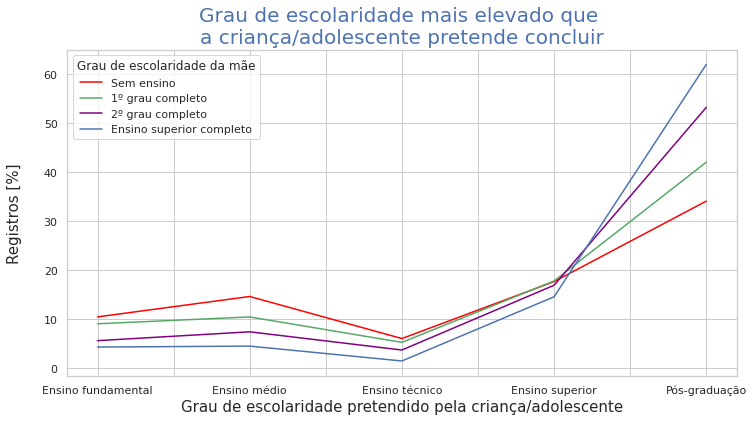

In [ ]:
plt.figure(figsize=(12,6))
pretensao_mae_sem_ensino['Percentual [%]'].plot(kind='line', label='Sem ensino', color='red')
pretensao_mae_ate_1_grau['Percentual [%]'].plot(kind='line', label='1º grau completo', color='g')
pretensao_mae_ate_2_grau['Percentual [%]'].plot(kind='line', label='2º grau completo', color='purple')
pretensao_mae_com_superior['Percentual [%]'].plot(kind='line', label='Ensino superior completo')
plt.legend().set_title('Grau de escolaridade da mãe')
plt.xlabel('Grau de escolaridade pretendido pela criança/adolescente', fontsize=15)
plt.ylabel('Registros [%]\n', fontsize=15)
plt.title('Grau de escolaridade mais elevado que \na criança/adolescente pretende concluir', fontsize=20).set_color('b')
plt.show()

<font color='red'>Conclusão hipótese 09.1.1:</font> Apesar de, felizmente, percebermos no gráfico que a maior parte das crianças/adolescentes de mães em qualquer nível de estudo completo pretende continuar os estudos até a pós-graduação, é claro que essa tendência é bastante acentuada nas crianças/adolescentes com mães com maiores níves de estudo. Filhos de mães com ensino superior são os que mais pretendem parar os estudos apenas na pós graduação enquanto que são os que menos pretendem parar no ensino fundamental. Interessante notar que essa tendência só se inverte depois do ensino superior.

<font color='blue'>Hipótese 09.1.2:</font> O nível escolar da mãe, que pode ser traduzido indiretamente como grau de instrução da mãe, influencia diretamente no uso de drogas. Crianças/adolescentes com mães com menor nível de instrução têm maior tendência a ter contato e serem usuários ativos de drogas ilícitas.

In [ ]:
#Já usaram X situação Pai Mãe
mae_sem_ensino_usu = mae_sem_ensino.query('VB06001 == 1')['VB06001'].sum()
mae_ate_1_grau_usu = mae_ate_1_grau.query('VB06001 == 1')['VB06001'].sum()
mae_ate_2_grau_usu = mae_ate_2_grau.query('VB06001 == 1')['VB06001'].sum()
mae_com_superior_usu = mae_com_superior.query('VB06001 == 1')['VB06001'].sum()
serie_ensino_mae_usu = pd.Series([mae_sem_ensino_usu, mae_ate_1_grau_usu, 
                              mae_ate_2_grau_usu, mae_com_superior_usu], index=df_ensino_mae.index)

#Usuários ativos X situação Pai Mãe
mae_sem_ensino_ativos = mae_sem_ensino['VB06003A'].value_counts()[2:-1].sum()
mae_ate_1_grau_ativos = mae_ate_1_grau['VB06003A'].value_counts()[2:-1].sum()
mae_ate_2_grau_ativos = mae_ate_2_grau['VB06003A'].value_counts()[2:-1].sum()
mae_com_superior_ativos = mae_com_superior['VB06003A'].value_counts()[2:-1].sum()
serie_ensino_mae_ativos = pd.Series([mae_sem_ensino_ativos, mae_ate_1_grau_ativos, 
                                     mae_ate_2_grau_ativos, mae_com_superior_ativos], index=df_ensino_mae.index)

In [ ]:
#Dataframe de registros X já tiveram contato com drogas ilícitas
df_ensino_mae_usu = df_ensino_mae[['Registros']]
df_ensino_mae_usu['Já usaram drogas ilícitas'] = serie_ensino_mae_usu
df_ensino_mae_usu['Percentual [%]'] = (df_ensino_mae_usu['Já usaram drogas ilícitas'] / df_ensino_mae_usu['Registros'])*100
df_ensino_mae_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Nível escolar da mãe,,,
Sem ensino escolar,3484,332,9.53
Até o 1º grau completo,2002,221,11.04
Até o 2º grau completo,3769,363,9.63
Ensino superior completo,3099,279,9.00


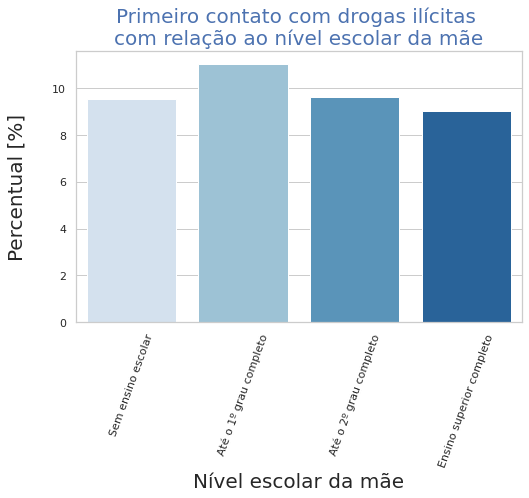

In [ ]:
#Gráfico do percentual das crianças/adolescentes que tiveram contato com drogas ilícitas
plt.figure(figsize=(8,5))
sns.barplot(data=df_ensino_mae_usu, x=df_ensino_mae_usu.index, y='Percentual [%]', palette='Blues')
plt.xticks(rotation=70)
plt.xlabel('Nível escolar da mãe',fontsize=20)
plt.ylabel('Percentual [%]\n', fontsize=20)
plt.title('Primeiro contato com drogas ilícitas \ncom relação ao nível escolar da mãe', fontsize=20).set_color('b')
plt.show()

In [ ]:
#Dataframe de registros X usuários ativos de drogas ilícitas
df_ensino_mae_ativo = df_ensino_mae[['Registros']]
df_ensino_mae_ativo['Usuários ativos de drogas ilícitas'] = serie_ensino_mae_ativos
df_ensino_mae_ativo['Percentual [%]'] = (df_ensino_mae_ativo['Usuários ativos de drogas ilícitas'] / df_ensino_mae_ativo['Registros'])*100
df_ensino_mae_ativo

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Nível escolar da mãe,,,
Sem ensino escolar,3484,145,4.16
Até o 1º grau completo,2002,97,4.85
Até o 2º grau completo,3769,135,3.58
Ensino superior completo,3099,126,4.07


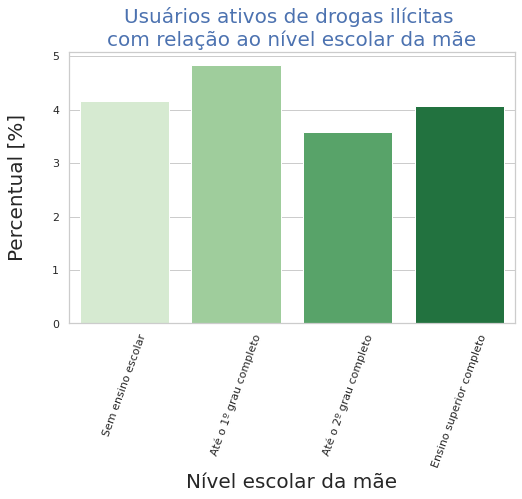

In [ ]:
#Gráfico do percentual das crianças/adolescentes que são usuários ativos de drogas ilícitas
plt.figure(figsize=(8,5))
sns.barplot(data=df_ensino_mae_ativo, x=df_ensino_mae_ativo.index, y='Percentual [%]', palette='Greens')
plt.xticks(rotation=70)
plt.xlabel('Nível escolar da mãe',fontsize=20)
plt.ylabel('Percentual [%]\n', fontsize=20)
plt.title('Usuários ativos de drogas ilícitas \ncom relação ao nível escolar da mãe', fontsize=20).set_color('b')
plt.show()

In [ ]:
#Dataframe de já tiveram contato com drogas ilícitas X usuários ativos
df_ensino_mae_usu_ativo = df_ensino_mae_usu[['Já usaram drogas ilícitas']]
df_ensino_mae_usu_ativo['Usuários ativos de drogas ilícitas'] = serie_ensino_mae_ativos
df_ensino_mae_usu_ativo['Percentual [%]'] = (df_ensino_mae_ativo['Usuários ativos de drogas ilícitas'] / df_ensino_mae_usu_ativo['Já usaram drogas ilícitas'])*100
df_ensino_mae_usu_ativo

,Já usaram drogas ilícitas,Usuários ativos de drogas ilícitas,Percentual [%]
Nível escolar da mãe,,,
Sem ensino escolar,332,145,43.67
Até o 1º grau completo,221,97,43.89
Até o 2º grau completo,363,135,37.19
Ensino superior completo,279,126,45.16


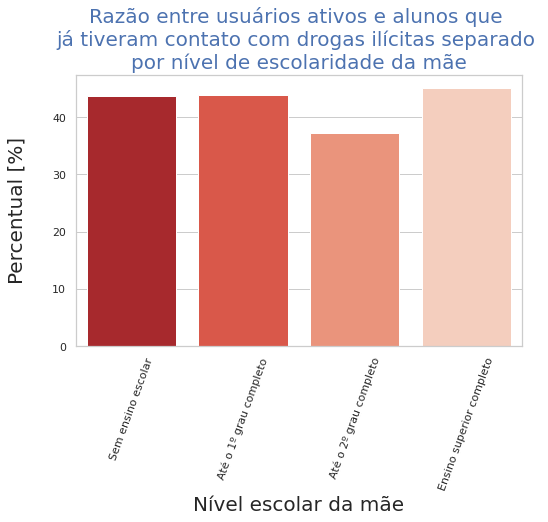

In [ ]:
#Gráfico do percentual das crianças/adolescentes que são usuários ativos de drogas ilícitas
plt.figure(figsize=(8,5))
sns.barplot(data=df_ensino_mae_usu_ativo, x=df_ensino_mae_usu_ativo.index, y='Percentual [%]', palette='Reds_r')
plt.xticks(rotation=70)
plt.xlabel('Nível escolar da mãe',fontsize=20)
plt.ylabel('Percentual [%]\n', fontsize=20)
plt.title('Razão entre usuários ativos e alunos que \njá tiveram contato com drogas ilícitas separado \npor nível de escolaridade da mãe', fontsize=20).set_color('b')
plt.show()

<font color='red'>Conclusão da hipótese 09.1.2:</font> O nível de escolaridade da mãe tem pouca ou nenhuma influência na questão das crianças/adolescentes terem contato e/ou serem usuárias ativas de drogas ilícitas.

### **09.2 - Fome**
***

Utilizarei aqui a seguinte questão:

In [ ]:
print(f'Questão "VB02024": \n{dic_pense["VB02024"]}\n')

Questão "VB02024": 
NOS ÚLTIMOS 30 DIAS, com que frequência você ficou com fome por não ter comida suficiente em sua casa?



Neste tópico farei uma análise simples para entender se a fome é um gancho para o uso de drogas ilícitas.

Considerando que em uma família em condição social boa nunca falta comida, compararei as crianças/adolescentes que responderam "NUNCA" na pergunta "NOS ÚLTIMOS 30 DIAS, com que frequência você ficou com fome por não ter comida suficiente em sua casa?" com as demais.

<font color='blue'>Hipótese 09.2.1:</font> A fome gera um ambiente com fraco "enriquecimento ambiental" e desta forma aumenta as chances das crianças/adolescentes já terem tido contato com drogas ilícitas ou serem usuárias ativas.

In [ ]:
#Separando a base de dados em crianças/adolescentes que passaram (ou não) fome nos últimos 30 dias.
dados_sem_fome = dados[(dados['VB02024'] == 1)]
dados_com_fome = dados[(dados['VB02024'] >= 2) & (dados['VB02024'] != 99)]

In [ ]:
#Dataframe de registros
df_fome = df_registros(dados_sem_fome, dados_com_fome, 'Não passou fome nenhuma vez nos últimos 30 dias', 'Passou fome alguma vez nos últimos 30 dias')
df_fome

,Registros,Percentual [%]
Situação,,
Não passou fome nenhuma vez nos últimos 30 dias,12825,77.60
Passou fome alguma vez nos últimos 30 dias,3701,22.40


In [ ]:
df_fome_usu = df_sem_com_usu(df_fome, dados_sem_fome, dados_com_fome)
df_fome_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
Não passou fome nenhuma vez nos últimos 30 dias,12825,1072,8.36
Passou fome alguma vez nos últimos 30 dias,3701,367,9.92


In [ ]:
razao_pct_fome_usu = '{:.2f}'.format(df_fome_usu.iloc[1][2] / df_fome_usu.iloc[0][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando há fome envolvida é {razao_pct_fome_usu} vezes maior.')

A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando há fome envolvida é 1.19 vezes maior.


In [ ]:
df_fome_ativos = df_sem_com_ativos(df_fome, dados_sem_fome, dados_com_fome)
df_fome_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
Não passou fome nenhuma vez nos últimos 30 dias,12825,456,3.56
Passou fome alguma vez nos últimos 30 dias,3701,178,4.81


In [ ]:
razao_pct_fome_ativos = '{:.2f}'.format(df_fome_ativos.iloc[1][2] / df_fome_ativos.iloc[0][2])
print(f'A chance de uma criança/adolescente ser usuário ativo de drogas \nilícitas quando há fome envolvida é {razao_pct_fome_ativos} vezes maior.')

A chance de uma criança/adolescente ser usuário ativo de drogas 
ilícitas quando há fome envolvida é 1.35 vezes maior.


<font color='red'>Conclusão hipótese 09.2.1:</font> A fome não influencia diretamente no consumo de drogas. As diferenças são muito pequenas para serem representativas.

### **09.3 - Dependência administrativa da escola (pública ou privada)**
***

<font color='blue'>Hipótese 09.3.1:</font> Aqui no Brasil escolas privadas tendem a ser frequêntadas por pessoas de classes sociais com melhores condições financeiras e acredita-se que essas famílias são mais bem instruídas e portanto terão um menor contato com drogas ilícitas.

A seguir utilizarei a seguinte questão:

In [ ]:
print(f'Questão "VB0007": \n{dic_pense["V0007"]}\nPública ou privada?')

Questão "VB0007": 
Dependência Administrativa da escola
Pública ou privada?


In [ ]:
#Separação dos dados por depêndência administrativa da escola
escola_privada = dados[(dados['V0007'] == 2)]
escola_publica = dados[(dados['V0007'] == 1)]

In [ ]:
#Dataframe de registros
df_dep_adm = df_registros(escola_privada, escola_publica, 'Alunos de escolas privadas', 'Alunos de escolas públicas')
df_dep_adm

,Registros,Percentual [%]
Situação,,
Alunos de escolas privadas,4175,25.22
Alunos de escolas públicas,12381,74.78


In [ ]:
#Dataframe de crianças/adolescentes que já tiveram contato com drogas ilícitas
df_dep_adm_usu = df_sem_com_usu(df_dep_adm, escola_privada, escola_publica)
df_dep_adm_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
Alunos de escolas privadas,4175,309,7.40
Alunos de escolas públicas,12381,1130,9.13


In [ ]:
razao_pct_dep_adm_usu = '{:.2f}'.format(df_dep_adm_usu.iloc[1][2] / df_dep_adm_usu.iloc[0][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando o aluno é de escola pública é {razao_pct_dep_adm_usu} vezes maior do que quando o aluno é de escola privada.')

A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando o aluno é de escola pública é 1.23 vezes maior do que quando o aluno é de escola privada.


In [ ]:
#Dataframe de crianças/adolescentes que são usuários ativos de drogas ilícitas
df_dep_adm_ativos = df_sem_com_ativos(df_dep_adm, escola_privada, escola_publica)
df_dep_adm_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
Alunos de escolas privadas,4175,113,2.71
Alunos de escolas públicas,12381,490,3.96


In [ ]:
razao_pct_dep_adm_ativos = '{:.2f}'.format(df_dep_adm_ativos.iloc[1][2] / df_dep_adm_ativos.iloc[0][2])
print(f'A chance de uma criança/adolescente ser usuário ativo de drogas \nilícitas quando o aluno é de escola pública é {razao_pct_dep_adm_ativos} vezes maior do que quando o aluno é de escola privada.')

A chance de uma criança/adolescente ser usuário ativo de drogas 
ilícitas quando o aluno é de escola pública é 1.46 vezes maior do que quando o aluno é de escola privada.


<font color='red'>Conclusão hipótese 09.3.1:</font> A dependência administrativa da escola (como forma de analisar por condição social da criança/adolescente) não influencia diretamente no consumo de drogas. Assim como na conclusão da hipótese 09.2.1, as diferenças são muito pequenas para serem representativas.

### **09.4 - Condição financeira**
***

In [ ]:
#@title Emprego

<font color='blue'>Hipótese 09.4.1:</font> O emprego, como forma de "enriquecimento ambiental" reduz as chances da criança/adolescente ter contato ou ser usuário ativo de drogas ilícitas.

A análise de emprego será feita em duas etapas. Uma primeira considerando apenas quem tem emprego ou não, independemente de haver uma renda envolvida, para entender se o emprego como forma de "enriquecimento ambiental" tem alguma influência no uso de drogas ilícitas. Na segunda etapa levará-se em conta se a existência de uma renda faz diferença.

Nesta análise utilizaremos as questões a seguir:

In [ ]:
dados_emprego = dados["VB01011"].value_counts().sort_index().rename(index=dic_sn)
porcent_emprego = '{:.2f}'.format((dados["VB01011"].value_counts()[1]/dados["VB01011"].value_counts().sum())*100)

print(f'Questão "VB01011: \n{dic_pense["VB01011"]} \n\n{dados_emprego} \n\nA porcentagem de crianças/adolescentes que têm algum trabalho, emprego ou negócio é {porcent_emprego}%.')


Questão "VB01011: 
Você tem algum trabalho, emprego ou negócio atualmente? 

Sim               2471
Não              14071
Não informado       14
Name: VB01011, dtype: int64 

A porcentagem de crianças/adolescentes que têm algum trabalho, emprego ou negócio é 14.93%.


In [ ]:
#Separação da base de dados
com_emprego = dados[(dados['VB01011'] == 1)]
sem_emprego = dados[(dados['VB01011'] == 2)]

In [ ]:
#Dataframe de registros
df_emprego = df_registros(com_emprego, sem_emprego, 'Possui algum trabalho, emprego ou negócio', 'Não possui nenhum trabalho, emprego ou negócio')
df_emprego

,Registros,Percentual [%]
Situação,,
"Possui algum trabalho, emprego ou negócio",2471,14.94
"Não possui nenhum trabalho, emprego ou negócio",14071,85.06


In [ ]:
#Dataframe de contato com drogas ilícitas
df_emprego_usu = df_sem_com_usu(df_emprego, com_emprego, sem_emprego)
df_emprego_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
"Possui algum trabalho, emprego ou negócio",2471,458,18.54
"Não possui nenhum trabalho, emprego ou negócio",14071,981,6.97


In [ ]:
razao_pct_emprego_usu = '{:.2f}'.format(df_emprego_usu.iloc[0][2] / df_emprego_usu.iloc[1][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando possui algum trabalho, emprego ou negócio é {razao_pct_emprego_usu} vezes maior.')

A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando possui algum trabalho, emprego ou negócio é 2.66 vezes maior.


In [ ]:
#Dataframe de usuários ativos de drogas ilícitas
df_emprego_ativos = df_sem_com_ativos(df_emprego, com_emprego, sem_emprego)
df_emprego_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
"Possui algum trabalho, emprego ou negócio",2471,210,8.50
"Não possui nenhum trabalho, emprego ou negócio",14071,424,3.01


In [ ]:
razao_pct_emprego_ativos = '{:.2f}'.format(df_emprego_ativos.iloc[0][2] / df_emprego_ativos.iloc[1][2])
print(f'A chance de uma criança/adolescente ser usuário ativo de drogas \nilícitas quando possui algum trabalho, emprego ou negócio é {razao_pct_emprego_ativos} vezes maior.')

A chance de uma criança/adolescente ser usuário ativo de drogas 
ilícitas quando possui algum trabalho, emprego ou negócio é 2.82 vezes maior.


<font color='red'>Conclusão hipótese 09.4.1:</font> Apesar do trabalho, emprego ou negócio ser uma forma de "enriquecimento ambiental", a análise mostrou que crianças/adolescentes que têm alguma ocupação têm maior chance de contato com drogas ilícitas. Talvez a renda seja a forma de acesso às drogas, e poderemos concluir na próxima etapa de análise da renda como gancho para o uso de drogas.

In [ ]:
#@title Renda

<font color='blue'>Hipótese 09.4.2:</font> A partir do resultado da hipótese anterior, a renda é um gancho para acesso às drogas e as crianças/adolescentes que possuem uma renda no trabalho têm maiores chances de terem contato com drogas do que aquelas que trabalham sem renda.

Neste tópico utilizarei apenas os registros positivos na questão de trabalho, emprego ou negócio da seguinte questão:

In [ ]:
dados_renda = dados[(dados["VB01011"] == 1)]['VB01012'].value_counts().sort_index().rename(index=dic_sn)
porcent_renda = '{:.2f}'.format((dados[(dados["VB01011"] == 1)]["VB01012"].value_counts()[1]/dados[(dados["VB01011"] == 1)]["VB01012"].value_counts().sum())*100)

print(f'Questão "VB01012: \n{dic_pense["VB01012"]} \n\n{dados_renda} \n\nA porcentagem de crianças/adolescentes que o trabalho, emprego ou negócio é com renda é {porcent_renda}%.')

Questão "VB01012: 
Você recebe dinheiro por este trabalho, emprego ou negócio? 

Sim              2252
Não               214
Não informado       5
Name: VB01012, dtype: int64 

A porcentagem de crianças/adolescentes que o trabalho, emprego ou negócio é com renda é 91.14%.


In [ ]:
#Separação dos dados para análise
sem_renda = dados[(dados["VB01011"] == 1) & (dados["VB01012"] == 2)]
com_renda = dados[(dados["VB01011"] == 1) & (dados["VB01012"] == 1)]

In [ ]:
#Dataframe de registros
df_renda = df_registros(sem_renda, com_renda, 'Sem renda no trabalho, emprego ou negócio', 'Com renda no trabalho, emprego ou negócio')
df_renda

,Registros,Percentual [%]
Situação,,
"Sem renda no trabalho, emprego ou negócio",214,8.68
"Com renda no trabalho, emprego ou negócio",2252,91.32


In [ ]:
#Dataframe de contato com drogas ilícitas
df_renda_usu = df_sem_com_usu(df_renda, sem_renda, com_renda)
df_renda_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
"Sem renda no trabalho, emprego ou negócio",214,20,9.35
"Com renda no trabalho, emprego ou negócio",2252,437,19.40


In [ ]:
razao_pct_renda_usu = '{:.2f}'.format(df_renda_usu.iloc[1][2] / df_renda_usu.iloc[0][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando trabalham com renda é {razao_pct_renda_usu} vezes maior do que aquelas que trabalham sem renda.')

A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando trabalham com renda é 2.08 vezes maior do que aquelas que trabalham sem renda.


In [ ]:
#Dataframe de contato com drogas ilícitas
df_renda_ativos = df_sem_com_ativos(df_renda, sem_renda, com_renda)
df_renda_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
"Sem renda no trabalho, emprego ou negócio",214,9,4.21
"Com renda no trabalho, emprego ou negócio",2252,201,8.93


In [ ]:
razao_pct_renda_ativos = '{:.2f}'.format(df_renda_ativos.iloc[1][2] / df_renda_ativos.iloc[0][2])
print(f'A chance de uma criança/adolescente ser usuário ativo de drogas \nilícitas quando trabalham com renda é {razao_pct_renda_ativos} vezes maior do que aquelas que trabalham sem renda.')

A chance de uma criança/adolescente ser usuário ativo de drogas 
ilícitas quando trabalham com renda é 2.12 vezes maior do que aquelas que trabalham sem renda.


<font color='red'>Conclusão hipótese 09.4.2:</font> Conforme previsto o trabalho com renda traz maiores chances da criança/adolescente ter contato com drogas, porém acredito que esse resultado está mais ligado ao fato do dinheiro ser a forma de acesso às drogas do que a renda ser um gancho para uso de drogas.

In [ ]:
#@title Ausência de renda

Para tirar melhores conclusões na hipótese anterior, a seguir farei um comparativo das pessoas que não trabalham e aquelas que trabalham sem renda.

In [ ]:
#Dataframe de registros
df_ausencia_renda = df_registros(sem_emprego, sem_renda, 'Sem trabalho', 'Trabalham sem renda')
df_ausencia_renda

,Registros,Percentual [%]
Situação,,
Sem trabalho,14071,98.50
Trabalham sem renda,214,1.50


In [ ]:
#Dataframe de contato com drogas ilícitas
df_ausencia_renda_usu = df_sem_com_usu(df_ausencia_renda, sem_emprego, sem_renda)
df_ausencia_renda_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
Sem trabalho,14071,981,6.97
Trabalham sem renda,214,20,9.35


In [ ]:
razao_pct_ausencia_renda_usu = '{:.2f}'.format(df_ausencia_renda_usu.iloc[1][2] / df_ausencia_renda_usu.iloc[0][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando trabalham sem renda é {razao_pct_ausencia_renda_usu} vezes maior do que aquelas que não trabalham.')

A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando trabalham sem renda é 1.34 vezes maior do que aquelas que não trabalham.


In [ ]:
#Dataframe de contato com drogas ilícitas
df_ausencia_renda_ativos = df_sem_com_ativos(df_ausencia_renda, sem_emprego, sem_renda)
df_ausencia_renda_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
Sem trabalho,14071,424,3.01
Trabalham sem renda,214,9,4.21


In [ ]:
razao_pct_ausencia_renda_ativos = '{:.2f}'.format(df_ausencia_renda_ativos.iloc[1][2] / df_ausencia_renda_ativos.iloc[0][2])
print(f'A chance de uma criança/adolescente ser usuário ativo de drogas \nilícitas quando trabalham sem renda é {razao_pct_ausencia_renda_ativos} vezes maior do que aquelas que não trabalham.')

A chance de uma criança/adolescente ser usuário ativo de drogas 
ilícitas quando trabalham sem renda é 1.40 vezes maior do que aquelas que não trabalham.


O "enriquecimento ambiental" da criança/adolescente com trabalho, emprego ou negócio, tirando da questão a renda, não parece ser um gancho importante para o uso de drogas, porém essa análise ficou pouco representativa uma vez que a base de dados dos que trabalham sem uma renda ficou pequena em comparação com o outro grupo.

In [ ]:
#@title Condição financeira familiar

Neste tópico será analisado se a condição financeira familiar é um gancho para o uso de drogas.

Serão utilizadas as seguintes questões:

In [ ]:
print(f'Questão "VB01015A": \n{dic_pense["VB01015A"]}\n')
print(f'Questão "VB01016": \n{dic_pense["VB01016"]}\n')
print(f'Questão "VB01017": \n{dic_pense["VB01017"]}\n')
print(f'Questão "VB01020A": \n{dic_pense["VB01020A"]}\n')
print('Considerarei do grupo de condição financeira favorável aqueles que responderem todas as questões positivamente \ne do grupo de condição financeira desfavorável aqueles que responderem todas as questões negativamente.')

Questão "VB01015A": 
Na sua casa tem computador (de mesa, ou netbook, laptop, etc)?

Questão "VB01016": 
Você tem acesso à internet em sua casa?

Questão "VB01017": 
Alguém que mora na sua casa tem carro?

Questão "VB01020A": 
Tem empregado(a) doméstico(a) recebendo dinheiro para fazer o trabalho em sua casa, três ou mais dias por semana?

Considerarei do grupo de condição financeira favorável aqueles que responderem todas as questões positivamente 
e do grupo de condição financeira desfavorável aqueles que responderem todas as questões negativamente.


In [ ]:
#Separação dos dados
rico = dados[(dados['VB01015A'] == 1) & (dados['VB01016'] == 1) & (dados['VB01017'] == 1) & (dados['VB01020A'] == 1)]
pobre = dados[(dados['VB01015A'] == 2) & (dados['VB01016'] == 2) & (dados['VB01017'] == 2) & (dados['VB01020A'] == 2)]

In [ ]:
#Dataframe de registros
df_riqueza = df_registros(rico, pobre, 'Condição financeira favorável', 'Condição financeira desfavorável')
df_riqueza

,Registros,Percentual [%]
Situação,,
Condição financeira favorável,1814,53.24
Condição financeira desfavorável,1593,46.76


In [ ]:
#Dataframe de contato com drogas ilícitas
df_riqueza_usu = df_sem_com_usu(df_riqueza, rico, pobre)
df_riqueza_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
Condição financeira favorável,1814,182,10.03
Condição financeira desfavorável,1593,122,7.66


In [ ]:
razao_pct_riqueza_usu = '{:.2f}'.format(df_riqueza_usu.iloc[0][2] / df_riqueza_usu.iloc[1][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando a condição financeira é favorável é {razao_pct_riqueza_usu} vezes maior.')

A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando a condição financeira é favorável é 1.31 vezes maior.


In [ ]:
#Dataframe de contato com drogas ilícitas
df_riqueza_ativos = df_sem_com_ativos(df_riqueza, rico, pobre)
df_riqueza_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
Condição financeira favorável,1814,87,4.80
Condição financeira desfavorável,1593,50,3.14


In [ ]:
razao_pct_riqueza_ativos = '{:.2f}'.format(df_riqueza_ativos.iloc[0][2] / df_riqueza_ativos.iloc[1][2])
print(f'A chance de uma criança/adolescente ser usuário ativo de drogas \nilícitas quando a condição financeira é favorável é {razao_pct_riqueza_ativos} vezes maior.')

A chance de uma criança/adolescente ser usuário ativo de drogas 
ilícitas quando a condição financeira é favorável é 1.53 vezes maior.


Pelo resultado da análise a condição financeira não parece ser um gancho importante no uso de drogas ilícitas e, ao contrário do que muita gente pensa, os maiores consumidores de drogas ilícitas são pessoas de classe média e alta, apesar dessa diferença não ser muito importante.

## **10 - Análise de ganchos do ambiente escolar**
***
***

O ambiente escolar pode ser tanto a salvação da criança/adolescente bem como pode ser o catalizador do uso de drogas ilícitas. Ambientes escolares violentos ou com bullying podem isolar a criança/adolescente de forma que ela encontre na droga uma fuga da realidade. Por outro lado na escola pode se ensinar sobre os perigos do uso das substâncias e trazer conhecimentos importantes para impedir que os alunos caiam nesse mundo.

### **10.1 - Ambiente escolar pesado**
***

<font color='blue'>Hipótese 10.1.1:</font> Um ambiente escolar em que os alunos se ofendem, se humilham e se intimidam constantemente são um pavil para o isolamento e uso de drogas ilícitas.

Serão utilizadas para essa análise as duas questões abaixo.

In [ ]:
print(f'Questão "VB07006": \n{dic_pense["VB07006"]}\n')
print(f'Questão "VB07007": \n{dic_pense["VB07007"]}\n')

Questão "VB07006": 
NOS ÚLTIMOS 30 DIAS, com que frequência os colegas de sua escola trataram você bem e/ou foram prestativos contigo?

Questão "VB07007": 
NOS ÚLTIMOS 30 DIAS, com que frequência algum dos seus colegas de escola te esculacharam, zoaram, mangaram, intimidaram ou caçoaram tanto que você ficou magoado, incomodado, aborrecido, ofendido ou humilhado?



In [ ]:
#Separação dos dados em alunos que sofrem (ou não) ataques de colegas de escola
sem_esculacho = dados[(dados['VB07006'] >= 4) & (dados['VB07006'] != 99) & (dados['VB07007'] <=2)]
com_esculacho = dados[(dados['VB07006'] <= 2) & (dados['VB07007'] > 3) & (dados['VB07007'] != 99)]

In [ ]:
#Dataframe de registros
df_esculacho = df_registros(sem_esculacho, com_esculacho, 'Ambiente escolar saudável', 'Ambiente escolar pesado')
df_esculacho

,Registros,Percentual [%]
Situação,,
Ambiente escolar saudável,8850,95.26
Ambiente escolar pesado,440,4.74


In [ ]:
#Dataframe comparativo com contato com drogas ilícitas
df_esculacho_usu = df_sem_com_usu(df_esculacho, sem_esculacho, com_esculacho)
df_esculacho_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
Ambiente escolar saudável,8850,742,8.38
Ambiente escolar pesado,440,37,8.41


In [ ]:
razao_pct_esculacho_usu = '{:.2f}'.format(df_esculacho_usu.iloc[1][2] / df_esculacho_usu.iloc[0][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando o ambiente escolar é pesado é {razao_pct_esculacho_usu} vezes maior.')

A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando o ambiente escolar é pesado é 1.00 vezes maior.


In [ ]:
#Dataframe comparativo com usuários de drogas ilícitas
df_esculacho_ativos = df_sem_com_ativos(df_esculacho, sem_esculacho, com_esculacho)
df_esculacho_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
Ambiente escolar saudável,8850,318,3.59
Ambiente escolar pesado,440,20,4.55


In [ ]:
razao_pct_esculacho_ativos = '{:.2f}'.format(df_esculacho_ativos.iloc[1][2] / df_esculacho_ativos.iloc[0][2])
print(f'A chance de uma criança/adolescente ser usuário ativo de drogas \nilícitas quando o ambiente escolar é pesado é {razao_pct_esculacho_ativos} vezes maior.')

A chance de uma criança/adolescente ser usuário ativo de drogas 
ilícitas quando o ambiente escolar é pesado é 1.27 vezes maior.


<font color='red'>Conclusão da hipótese 10.1.1:</font> O ambiente escolar pesado, em que a criança/adolescente é humilhada, ofendida e intimidada e não se sente bem tratada pelos colegas de escola não parece ser um catalizador para o uso de drogas.

### **10.2 - Motivações de maus tratos por colegas de escola**
***

Neste tópico analisarei se os diferentes motivos de maus tratos na escola causam diferentes tendências ao uso de drogas ilícitas.

Minha motivação neste ponto é entender se tópicos que atacam auto estima, como aparência ou orientação sexual causam maiores tendências à busca por drogas ilícitas do que tópicos relacionados à religião, por exemplo.

In [ ]:
#Definição dos dados para análise
cor_raca = dados[(dados['VB07008'] == 1)]
religiao = dados[(dados['VB07008'] == 2)]
aparencia_rosto = dados[(dados['VB07008'] == 3)]
aparencia_corpo = dados[(dados['VB07008'] == 4)]
orientacao = dados[(dados['VB07008'] == 5)]
origem = dados[(dados['VB07008'] == 6)]
total_motivos = dados[(dados['VB07008'] >= 1) & (dados['VB07008'] < 7)].shape[0]

pct_cor_raca = '{:.2f}'.format((cor_raca.shape[0]/total_motivos)*100)
pct_religiao = '{:.2f}'.format((religiao.shape[0]/total_motivos)*100)
pct_aparencia_rosto = '{:.2f}'.format((aparencia_rosto.shape[0]/total_motivos)*100)
pct_aparencia_corpo = '{:.2f}'.format((aparencia_corpo.shape[0]/total_motivos)*100)
pct_orientacao = '{:.2f}'.format((orientacao.shape[0]/total_motivos)*100)
pct_origem = '{:.2f}'.format((origem.shape[0]/total_motivos)*100)

In [ ]:
#Dataframe com os diferentes motivos de maus tratos na escola.
dic_motivos = {'Registros': [cor_raca.shape[0], religiao.shape[0], aparencia_rosto.shape[0], aparencia_corpo.shape[0], orientacao.shape[0], origem.shape[0]],
              'Percentual [%]': [pct_cor_raca, pct_religiao, pct_aparencia_rosto, pct_aparencia_corpo, pct_orientacao, pct_origem],
              'Motivação dos ataques': ['Cor e raça', 'Religião', 'Aparência do rosto', 'Aparência do corpo', 'Orientação sexual', 'Região de origem']}
df_motivos = pd.DataFrame(dic_motivos)
df_motivos.set_index('Motivação dos ataques', inplace=True)
df_motivos


,Registros,Percentual [%]
Motivação dos ataques,,
Cor e raça,403,14.72
Religião,241,8.80
Aparência do rosto,705,25.75
Aparência do corpo,1110,40.54
Orientação sexual,160,5.84
Região de origem,119,4.35


In [ ]:
#Já usaram X situação Pai Mãe
cor_raca_usu = cor_raca.query('VB06001 == 1')['VB06001'].sum()
religiao_usu = religiao.query('VB06001 == 1')['VB06001'].sum()
aparencia_rosto_usu = aparencia_rosto.query('VB06001 == 1')['VB06001'].sum()
aparencia_corpo_usu = aparencia_corpo.query('VB06001 == 1')['VB06001'].sum()
orientacao_usu = orientacao.query('VB06001 == 1')['VB06001'].sum()
origem_usu = origem.query('VB06001 == 1')['VB06001'].sum()
serie_motivos_usu = pd.Series([cor_raca_usu, religiao_usu, aparencia_rosto_usu, 
                               aparencia_corpo_usu, orientacao_usu, origem_usu], index=df_motivos.index)

#Usuários ativos X situação Pai Mãe
cor_raca_ativos = cor_raca['VB06003A'].value_counts()[2:-1].sum()
religiao_ativos = religiao['VB06003A'].value_counts()[2:-1].sum()
aparencia_rosto_ativos = aparencia_rosto['VB06003A'].value_counts()[2:-1].sum()
aparencia_corpo_ativos = aparencia_corpo['VB06003A'].value_counts()[2:-1].sum()
orientacao_ativos = orientacao['VB06003A'].value_counts()[2:-1].sum()
origem_ativos = origem['VB06003A'].value_counts()[2:-1].sum()
serie_motivos_ativos = pd.Series([cor_raca_ativos, religiao_ativos, aparencia_rosto_ativos,
                                  aparencia_corpo_ativos, orientacao_ativos, origem_ativos], index=df_motivos.index)

In [ ]:
#Dataframe de registros X já tiveram contato com drogas ilícitas
df_motivos_usu = df_motivos[['Registros']]
df_motivos_usu['Já usaram drogas ilícitas'] = serie_motivos_usu
df_motivos_usu['Percentual [%]'] = (df_motivos_usu['Já usaram drogas ilícitas'] / df_motivos_usu['Registros'])*100
df_motivos_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Motivação dos ataques,,,
Cor e raça,403,42,10.42
Religião,241,16,6.64
Aparência do rosto,705,53,7.52
Aparência do corpo,1110,100,9.01
Orientação sexual,160,41,25.62
Região de origem,119,14,11.76


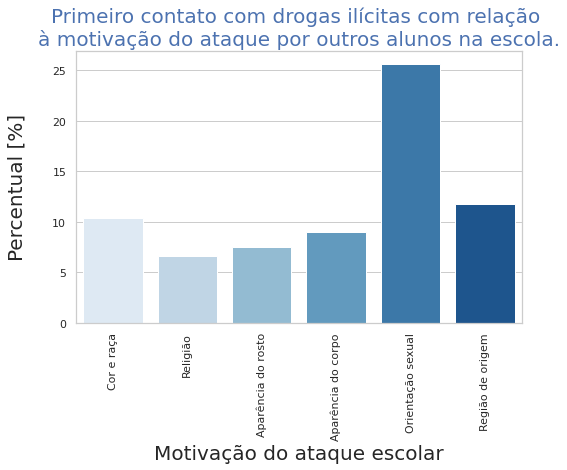

In [ ]:
#Gráfico do percentual das crianças/adolescentes que tiveram contato com drogas ilícitas
plt.figure(figsize=(8,5))
sns.barplot(data=df_motivos_usu, x=df_motivos_usu.index, y='Percentual [%]', palette='Blues')
plt.xticks(rotation=90)
plt.xlabel('Motivação do ataque escolar',fontsize=20)
plt.ylabel('Percentual [%]\n', fontsize=20)
plt.title('Primeiro contato com drogas ilícitas com relação \nà motivação do ataque por outros alunos na escola.', fontsize=20).set_color('b')
plt.show()

In [ ]:
#Dataframe de registros X usuários ativos de drogas ilícitas
df_motivos_ativo = df_motivos[['Registros']]
df_motivos_ativo['Usuários ativos de drogas ilícitas'] = serie_motivos_ativos
df_motivos_ativo['Percentual [%]'] = (df_motivos_ativo['Usuários ativos de drogas ilícitas'] / df_motivos_ativo['Registros'])*100
df_motivos_ativo

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Motivação dos ataques,,,
Cor e raça,403,21,5.21
Religião,241,8,3.32
Aparência do rosto,705,18,2.55
Aparência do corpo,1110,44,3.96
Orientação sexual,160,23,14.37
Região de origem,119,5,4.20


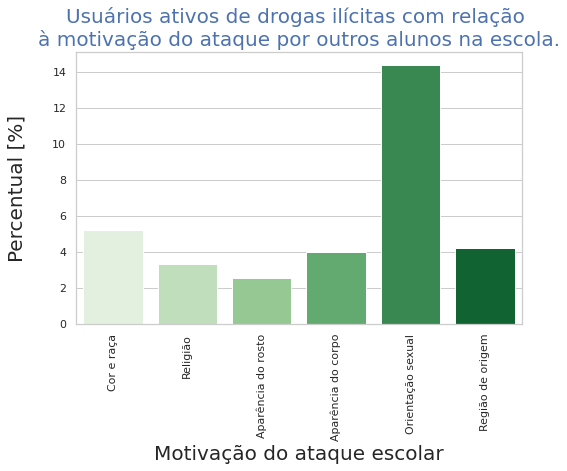

In [ ]:
#Gráfico do percentual das crianças/adolescentes que são usuários ativos de drogas ilícitas
plt.figure(figsize=(8,5))
sns.barplot(data=df_motivos_ativo, x=df_motivos_ativo.index, y='Percentual [%]', palette='Greens')
plt.xticks(rotation=90)
plt.xlabel('Motivação do ataque escolar',fontsize=20)
plt.ylabel('Percentual [%]\n', fontsize=20)
plt.title('Usuários ativos de drogas ilícitas com relação \nà motivação do ataque por outros alunos na escola.', fontsize=20).set_color('b')
plt.show()

In [ ]:
#Dataframe de já tiveram contato com drogas ilícitas X usuários ativos
df_motivos_usu_ativo = df_motivos_usu[['Já usaram drogas ilícitas']]
df_motivos_usu_ativo['Usuários ativos de drogas ilícitas'] = serie_motivos_ativos
df_motivos_usu_ativo['Percentual [%]'] = (df_motivos_ativo['Usuários ativos de drogas ilícitas'] / df_motivos_usu_ativo['Já usaram drogas ilícitas'])*100
df_motivos_usu_ativo

,Já usaram drogas ilícitas,Usuários ativos de drogas ilícitas,Percentual [%]
Motivação dos ataques,,,
Cor e raça,42,21,50.00
Religião,16,8,50.00
Aparência do rosto,53,18,33.96
Aparência do corpo,100,44,44.00
Orientação sexual,41,23,56.10
Região de origem,14,5,35.71


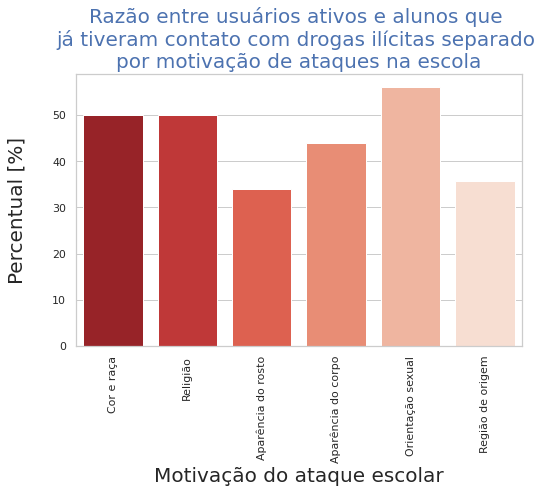

In [ ]:
#Gráfico do percentual das crianças/adolescentes que são usuários ativos de drogas ilícitas
plt.figure(figsize=(8,5))
sns.barplot(data=df_motivos_usu_ativo, x=df_motivos_usu_ativo.index, y='Percentual [%]', palette='Reds_r')
plt.xticks(rotation=90)
plt.xlabel('Motivação do ataque escolar',fontsize=20)
plt.ylabel('Percentual [%]\n', fontsize=20)
plt.title('Razão entre usuários ativos e alunos que \njá tiveram contato com drogas ilícitas separado \npor motivação de ataques na escola', fontsize=20).set_color('b')
plt.show()

Parece haver uma relação entre a motivação do ataque escolar relacionado à orientação sexual do aluno e o uso de drogas ilícitas. Curioso notar que apenas nesse ponto houve um valor elevado. Acredito que esse fato não está diretamente relacionado com os ataques na escola e sim com a não aceitação dos pais e a, com o perdão da redundância, homofobia doméstica.

Para entender isso farei uma análise para comparar quantos dessas crianças/adolescentes não moram com os pais.

<font color='blue'>Hipótese 10.2.1:</font> As crianças/adolescentes que sofrem com ataques na escola por conta de sua orientação sexual não são bem aceitos, também, em casa e há um alto índice desses jovens vivendo sem algum ou nenhum dos pais em sua moradia.

In [ ]:
com_pai_mae_orientacao = com_pai_mae[(com_pai_mae['VB07008'] == 5)]
sem_pai_orientacao = sem_pai[(sem_pai['VB07008'] == 5)]
sem_mae_orientacao = sem_mae[(sem_mae['VB07008'] == 5)]
sem_pai_mae_orientacao = sem_pai_mae[(sem_pai_mae['VB07008'] == 5)]

pct_com_pai_mae_orientacao = (com_pai_mae_orientacao.shape[0] / com_pai_mae.shape[0]) * 100
pct_sem_pai_orientacao = (sem_pai_orientacao.shape[0] / sem_pai.shape[0]) * 100
pct_sem_mae_orientacao = (sem_mae_orientacao.shape[0] / sem_mae.shape[0]) * 100
pct_sem_pai_mae_orientacao = (sem_pai_mae_orientacao.shape[0] / sem_pai_mae.shape[0]) * 100

dic_orientacao = {'Registros': [com_pai_mae.shape[0], sem_pai.shape[0], sem_mae.shape[0], sem_pai_mae.shape[0]],
                  'Sofrem ataques por orientação sexual': [com_pai_mae_orientacao.shape[0], sem_pai_orientacao.shape[0], sem_mae_orientacao.shape[0], sem_pai_mae_orientacao.shape[0]],
                  'Porcentagem [%]': [pct_com_pai_mae_orientacao, pct_sem_pai_orientacao, pct_sem_mae_orientacao, pct_sem_pai_mae_orientacao],
                  'Situação': ['Mora com pai e mãe', 'Mora apenas com a mãe', 'Mora apenas com o pai', 'Não mora com o pai nem a mãe']}
df_orientacao = pd.DataFrame(dic_orientacao)
df_orientacao.set_index('Situação', inplace=True)
df_orientacao

,Registros,Sofrem ataques por orientação sexual,Porcentagem [%]
Situação,,,
Mora com pai e mãe,9689,77,0.79
Mora apenas com a mãe,4983,59,1.18
Mora apenas com o pai,769,7,0.91
Não mora com o pai nem a mãe,1096,17,1.55


In [ ]:
rz_pct_orientacao = '{:.2f}'.format(df_orientacao.iloc[3][2] / df_orientacao.iloc[0][2])
print(f'A quantidade relativa de crianças/adolescentes com orientação sexual fora do padrão \nque não vivem com nenhum dos pais é {rz_pct_orientacao} vezes maior do que as que vivem com pai e mãe.')

A quantidade relativa de crianças/adolescentes com orientação sexual fora do padrão 
que não vivem com nenhum dos pais é 1.95 vezes maior do que as que vivem com pai e mãe.


<font color='red'>Conclusão hipótese 10.2.1:</font> Não foram encontradas grandes diferenças nos valores de registros de crianças/adolescentes com problemas de ataques por sua orientação sexual na escola na presença de ambos os pais ou um deles, porém ao compararmos esses jovens vivendo com pai e mãe e sem nenhum deles o número de registros relativos é o dobro, o que faz pensar que o problema do alto índice de contato com drogas ilícitas nestas crianças/adolescentes está relacionado com algum outro problema que não os ataques na escola.

## **11 - Análise de ganchos de auto estima**
***
***

Neste tópico analisarei os ganchos relacionados à auto estima. Solidão, bullying, amizades e como se sente com relação ao próprio corpo serão meus objetos de análise.

### **11.1 - Solidão**
***

Será utilizada para essa análise a seguinte questão:

In [ ]:
print(f'Questão "VB12001": \n{dic_pense["VB12001"]}\n')

Questão "VB12001": 
NOS ÚLTIMOS 12 MESES com que frequência tem se sentido sozinho(a)? 



Para evitar resultados pouco representativos separarei a base de dados em (1) quem respondeu "Nunca" ou "Raramente" e (2) quem respondeu "Na maioria das vezes" ou "Sempre" na questão acima.

In [ ]:
#Separação das bases de dados
sem_solidao = dados[(dados['VB12001'] <= 2)]
com_solidao = dados[(dados['VB12001'] > 3) & (dados['VB12001'] != 99)]

In [ ]:
#Dataframe de registros
df_solidao = df_registros(sem_solidao, com_solidao, 'Raramente sente solidão', 'Frequentemente sente solidão')
df_solidao

,Registros,Percentual [%]
Situação,,
Raramente sente solidão,9389,78.83
Frequentemente sente solidão,2521,21.17


In [ ]:
#Dataframe de contato com drogas ilícitas
df_solidao_usu = df_sem_com_usu(df_solidao, sem_solidao, com_solidao)
df_solidao_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
Raramente sente solidão,9389,673,7.17
Frequentemente sente solidão,2521,341,13.53


In [ ]:
razao_pct_solidao_usu = '{:.2f}'.format(df_solidao_usu.iloc[1][2] / df_solidao_usu.iloc[0][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando se sente constantemente sozinha é {razao_pct_solidao_usu} vezes maior.')

A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando se sente constantemente sozinha é 1.89 vezes maior.


In [ ]:
#Dataframe de usuários ativos de drogas ilícitas
df_solidao_ativos = df_sem_com_ativos(df_solidao, sem_solidao, com_solidao)
df_solidao_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
Raramente sente solidão,9389,307,3.27
Frequentemente sente solidão,2521,148,5.87


In [ ]:
razao_pct_solidao_ativos = '{:.2f}'.format(df_solidao_ativos.iloc[1][2] / df_solidao_ativos.iloc[0][2])
print(f'A chance de uma criança/adolescente ser usuário ativo de drogas \nilícitas quando se sente constantemente sozinha é {razao_pct_solidao_ativos} vezes maior.')

A chance de uma criança/adolescente ser usuário ativo de drogas 
ilícitas quando se sente constantemente sozinha é 1.80 vezes maior.


As chances da criança/adolescente que sente solidão constante já terem tido contato ou serem usuárias ativas de drogas ilícitas é quase 2 vezes maior. 

### **11.2 - Amizades**
***

Neste tópico será analisado basicamente se crianças/adolescentes sem nenhum amigo próximo têm maiores problemas com drogas ilícitas do que àquelas que possuem algum amigo.

Será utilizada nessa análise a seguinte questão:

In [ ]:
print(f'Questão "VB12003": \n{dic_pense["VB12003"]}\n')

Questão "VB12003": 
Quantos amigos(as) próximos você tem?



Os dados serão separados em crianças/adolescentes que têm pelo menos 1 amigo próximo das que não têm nenhum.

In [ ]:
#Separação da base de dados
com_amigos = dados[(dados['VB12003'] > 1) & (dados['VB12003'] != 99)]
sem_amigos = dados[(dados['VB12003'] == 1)]

In [ ]:
#Dataframe de registros
df_amigos = df_registros(com_amigos, sem_amigos, 'Possui amigo próximo', 'Não possui amigo próximo')
df_amigos

,Registros,Percentual [%]
Situação,,
Possui amigo próximo,15847,96.11
Não possui amigo próximo,642,3.89


In [ ]:
#Dataframe de contato com drogas ilícitas
df_amigos_usu = df_sem_com_usu(df_amigos, com_amigos, sem_amigos)
df_amigos_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
Possui amigo próximo,15847,1342,8.47
Não possui amigo próximo,642,90,14.02


In [ ]:
razao_pct_amigos_usu = '{:.2f}'.format(df_amigos_usu.iloc[1][2] / df_amigos_usu.iloc[0][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando não possui amigos próximos é {razao_pct_amigos_usu} vezes maior.')

A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando não possui amigos próximos é 1.66 vezes maior.


In [ ]:
#Dataframe de usuários ativos de drogas ilícitas
df_amigos_ativos = df_sem_com_ativos(df_amigos, com_amigos, sem_amigos)
df_amigos_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
Possui amigo próximo,15847,590,3.72
Não possui amigo próximo,642,23,3.58


In [ ]:
razao_pct_amigos_ativos = '{:.2f}'.format(df_amigos_ativos.iloc[1][2] / df_amigos_ativos.iloc[0][2])
print(f'A chance de uma criança/adolescente ser usuário ativo de drogas \nilícitas quando não possui amigos próximos é {razao_pct_amigos_ativos} vezes maior.')

A chance de uma criança/adolescente ser usuário ativo de drogas 
ilícitas quando não possui amigos próximos é 0.96 vezes maior.


Apesar de as chances das crianças/adolescentes sem nenhuma amizade terem tido algum contato com drogas ser maior, na análise de usuários ativos de drogas ilícitas não houve nenhuma diferença, portanto a presença ou ausência de amizades não parece ser um gancho importante.

### **11.3 - Bullying**
***

Será utilizada nessa análise a seguinte questão:

In [ ]:
dados_bullying = dados["VB07010"].value_counts().sort_index().rename(index={1:'Sim', 2:'Não', 3:'Não sei o que é bullying', 99:'Não informado'})
porcent_bullying = '{:.2f}'.format((dados["VB07010"].value_counts()[1]/dados["VB07010"].value_counts().sum())*100)

print(f'Questão "VB07010: \n{dic_pense["VB07010"]} \n\n{dados_bullying} \n\nA porcentagem de crianças/adolescentes que já sofreram bullying é {porcent_bullying}%.')


Questão "VB07010: 
Você já sofreu bullying? 

Sim                         7584
Não                         8533
Não sei o que é bullying     387
Não informado                 52
Name: VB07010, dtype: int64 

A porcentagem de crianças/adolescentes que já sofreram bullying é 45.81%.


In [ ]:
#Separação da base de dados
sem_bullying = dados[(dados['VB07010'] == 2)]
com_bullying = dados[(dados['VB07010'] == 1)]

In [ ]:
#Dataframe de registros
df_bullying = df_registros(sem_bullying, com_bullying, 'Nunca sofreram bullying', 'Já sofreram bullying')
df_bullying

,Registros,Percentual [%]
Situação,,
Nunca sofreram bullying,8533,52.94
Já sofreram bullying,7584,47.06


In [ ]:
#Dataframe de contato com drogas ilícitas
df_bullying_usu = df_sem_com_usu(df_bullying, sem_bullying, com_bullying)
df_bullying_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
Nunca sofreram bullying,8533,648,7.59
Já sofreram bullying,7584,759,10.01


In [ ]:
razao_pct_bullying_usu = '{:.2f}'.format(df_bullying_usu.iloc[1][2] / df_bullying_usu.iloc[0][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando declara já ter sofrido bullying é {razao_pct_bullying_usu} vezes maior.')

A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando declara já ter sofrido bullying é 1.32 vezes maior.


In [ ]:
#Dataframe de usuários ativos de drogas ilícitas
df_bullying_ativos = df_sem_com_ativos(df_bullying, sem_bullying, com_bullying)
df_bullying_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
Nunca sofreram bullying,8533,302,3.54
Já sofreram bullying,7584,312,4.11


In [ ]:
razao_pct_bullying_ativos = '{:.2f}'.format(df_bullying_ativos.iloc[1][2] / df_bullying_ativos.iloc[0][2])
print(f'A chance de uma criança/adolescente ser usuário ativo de drogas \nilícitas quando declara já ter sofrido bullying é {razao_pct_bullying_ativos} vezes maior.')

A chance de uma criança/adolescente ser usuário ativo de drogas 
ilícitas quando declara já ter sofrido bullying é 1.16 vezes maior.


O bullying não parece ser um gancho para o uso de drogas ilícitas, porém a questão é um pouco vaga pois não se refere à crianças/adolescentes que sofrem bullying constantemente, o que torna a análise pouco significativa para se tirar qualquer conclusão.

### **11.4 - Imagem corporal**
***

A seguir apresentarei a análise de gancho relacionado à auto estima através da percepção do próprio corpo.

Utilizarei as seguintes questões neste tópico:

In [ ]:
print(f'Questão "VB11006": \n{dic_pense["VB11006"]}\nMuito importante, importante, pouco importante ou sem importância?\n')
print(f'Questão "VB11007": \n{dic_pense["VB11007"]}\n')
print(f'Questão "VB11001": \n{dic_pense["VB11001"]}\nMuito magro(a), magro(a), normal, gordo(a), muito gordo(a)?\n')
print(f'Questão "VB11002": \n{dic_pense["VB11002"]}\n')
print(f'Questão "VB11003": \n{dic_pense["VB11003"]}\n')
print(f'Questão "VB11004A": \n{dic_pense["VB11004A"]}\n')

Questão "VB11006": 
Você considera sua imagem corporal como sendo algo:
Muito importante, importante, pouco importante ou sem importância?

Questão "VB11007": 
Como você se sente em relação ao seu corpo?

Questão "VB11001": 
Quanto ao seu corpo, você se considera: 
Muito magro(a), magro(a), normal, gordo(a), muito gordo(a)?

Questão "VB11002": 
O que você está fazendo em relação a seu peso?

Questão "VB11003": 
NOS ÚLTIMOS 30 DIAS, você vomitou ou tomou laxantes para perder peso ou evitar ganhar peso? 

Questão "VB11004A": 
NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para perder peso, sem acompanhamento médico?



Inicialmente isolarei apenas as crianças/adolescentes em que a imagem corporal tem pelo menos um pouco de importância. Em seguida separarei os satisfeitos dos insatisfeitos com o próprio corpo e então tentarei entender as demais questões a partir desses dois grupos para depois decidir como farei a análise de gancho com as drogas ilícitas.

In [ ]:
#Isolando as crianças/adolescentes que vêem alguma importância na imagem corporal
im_corporal = dados[(dados['VB11006'] < 4)]

#Separação dos dados em satisfeito e insatisfeitos com o próprio corpo
insatis_corporal = im_corporal[(im_corporal['VB11007'] > 3) & (im_corporal['VB11007'] != 99)]
satis_corporal = im_corporal[(im_corporal['VB11007'] < 3)]

In [ ]:
dic_VB11001 = {1: 'Muito magro(a)',
                2: 'Magro(a)',
                3: 'Normal',
                4: 'Gordo(a)',
                5: 'Muito gordo(a)',
                99: 'Não informado'}

rz_insatis_corporal_normal = '{:.2f}'.format((insatis_corporal['VB11001'].value_counts()[3]/insatis_corporal.shape[0])*100)
rz_insatis_corporal_anormal = '{:.2f}'.format((insatis_corporal[(insatis_corporal['VB11001'] != 3) & (insatis_corporal['VB11001'] != 99)]['VB11001'].value_counts().sum()/insatis_corporal.shape[0])*100)

print(f'Grupo dos INSATISFEITOS com seu próprio corpo\n{dic_pense["VB11001"]}\n')
print(f'{insatis_corporal["VB11001"].value_counts().sort_index().rename(index=dic_VB11001)}\n')
print(f'{rz_insatis_corporal_normal}% das crianças/adolescentes insatisfeitos com o próprio corpo consideram seu corpo normal.')
print(f'{rz_insatis_corporal_anormal}% das crianças/adolescentes insatisfeitos com o próprio corpo consideram seu corpo gordo ou magro.')

Grupo dos INSATISFEITOS com seu próprio corpo
Quanto ao seu corpo, você se considera: 

Muito magro(a)     282
Magro(a)           383
Normal             552
Gordo(a)          1323
Muito gordo(a)     260
Não informado        2
Name: VB11001, dtype: int64

19.70% das crianças/adolescentes insatisfeitos com o próprio corpo consideram seu corpo normal.
80.23% das crianças/adolescentes insatisfeitos com o próprio corpo consideram seu corpo gordo ou magro.


In [ ]:
rz_satis_corporal_normal = '{:.2f}'.format((satis_corporal['VB11001'].value_counts()[3]/satis_corporal.shape[0])*100)
rz_satis_corporal_anormal = '{:.2f}'.format((satis_corporal[(satis_corporal['VB11001'] != 3) & (satis_corporal['VB11001'] != 99)]['VB11001'].value_counts().sum()/satis_corporal.shape[0])*100)

print(f'Grupo dos SATISFEITOS com seu próprio corpo\n{dic_pense["VB11001"]}\n')
print(f'{satis_corporal["VB11001"].value_counts().sort_index().rename(index=dic_VB11001)}\n')
print(f'{rz_satis_corporal_normal}% das crianças/adolescentes satisfeitos com o próprio corpo consideram seu corpo normal.')
print(f'{rz_satis_corporal_anormal}% das crianças/adolescentes satisfeitos com o próprio corpo consideram seu corpo gordo ou magro.')

Grupo dos SATISFEITOS com seu próprio corpo
Quanto ao seu corpo, você se considera: 

Muito magro(a)     473
Magro(a)          2391
Normal            7248
Gordo(a)           946
Muito gordo(a)      51
Não informado       19
Name: VB11001, dtype: int64

65.13% das crianças/adolescentes satisfeitos com o próprio corpo consideram seu corpo normal.
34.70% das crianças/adolescentes satisfeitos com o próprio corpo consideram seu corpo gordo ou magro.


In [ ]:
dic_VB11002 = {1: 'Não estou fazendo nada',
               2: 'Estou tentando perder peso',
               3: 'Estou tentando ganhar peso',
               4: 'Estou tentando manter o mesmo peso',
               99: 'Não informado'}

rz_insatis_corporal_inercia = '{:.2f}'.format((insatis_corporal[(insatis_corporal['VB11002'] == 1) | (insatis_corporal['VB11002'] == 4)]['VB11002'].value_counts().sum()/insatis_corporal.shape[0])*100)
rz_insatis_corporal_tentando = '{:.2f}'.format((insatis_corporal[(insatis_corporal['VB11002'] == 2) | (insatis_corporal['VB11002'] == 3)]['VB11002'].value_counts().sum()/insatis_corporal.shape[0])*100)

print(f'Grupo dos INSATISFEITOS com seu próprio corpo\n{dic_pense["VB11002"]}\n')
print(f'{insatis_corporal["VB11002"].value_counts().sort_index().rename(index=dic_VB11002)}\n')
print(f'{rz_insatis_corporal_inercia}% das crianças/adolescentes insatisfeitos com o próprio corpo não estão tentando emagrecer ou ganhar peso.')
print(f'{rz_insatis_corporal_tentando}% das crianças/adolescentes insatisfeitos com o próprio corpo estão tentando emagrecer ou ganhar peso.')

Grupo dos INSATISFEITOS com seu próprio corpo
O que você está fazendo em relação a seu peso?

Não estou fazendo nada                 698
Estou tentando perder peso            1450
Estou tentando ganhar peso             483
Estou tentando manter o mesmo peso     166
Não informado                            5
Name: VB11002, dtype: int64

30.84% das crianças/adolescentes insatisfeitos com o próprio corpo não estão tentando emagrecer ou ganhar peso.
68.99% das crianças/adolescentes insatisfeitos com o próprio corpo estão tentando emagrecer ou ganhar peso.


In [ ]:
rz_satis_corporal_inercia = '{:.2f}'.format((satis_corporal[(satis_corporal['VB11002'] == 1) | (satis_corporal['VB11002'] == 4)]['VB11002'].value_counts().sum()/satis_corporal.shape[0])*100)
rz_satis_corporal_tentando = '{:.2f}'.format((satis_corporal[(satis_corporal['VB11002'] == 2) | (satis_corporal['VB11002'] == 3)]['VB11002'].value_counts().sum()/satis_corporal.shape[0])*100)

print(f'Grupo dos SATISFEITOS com seu próprio corpo\n{dic_pense["VB11002"]}\n')
print(f'{satis_corporal["VB11002"].value_counts().sort_index().rename(index=dic_VB11002)}\n')
print(f'{rz_satis_corporal_inercia}% das crianças/adolescentes satisfeitos com o próprio corpo não estão tentando emagrecer ou ganhar peso.')
print(f'{rz_satis_corporal_tentando}% das crianças/adolescentes satisfeitos com o próprio corpo estão tentando emagrecer ou ganhar peso.')

Grupo dos SATISFEITOS com seu próprio corpo
O que você está fazendo em relação a seu peso?

Não estou fazendo nada                4577
Estou tentando perder peso            2393
Estou tentando ganhar peso            1765
Estou tentando manter o mesmo peso    2367
Não informado                           26
Name: VB11002, dtype: int64

62.40% das crianças/adolescentes satisfeitos com o próprio corpo não estão tentando emagrecer ou ganhar peso.
37.37% das crianças/adolescentes satisfeitos com o próprio corpo estão tentando emagrecer ou ganhar peso.


In [ ]:
rz_insatis_corporal_laxante = '{:.2f}'.format((insatis_corporal[(insatis_corporal['VB11003'] == 1)]['VB11003'].value_counts().sum()/insatis_corporal.shape[0])*100)

print(f'Grupo dos INSATISFEITOS com seu próprio corpo\n{dic_pense["VB11003"]}\n')
print(f'{insatis_corporal["VB11003"].value_counts().sort_index().rename(index=dic_sn)}\n')
print(f'{rz_insatis_corporal_laxante}% das crianças/adolescentes insatisfeitos com o próprio corpo \nvomitou ou tomou laxante para perder peso ou evitar ganhar peso.')

Grupo dos INSATISFEITOS com seu próprio corpo
NOS ÚLTIMOS 30 DIAS, você vomitou ou tomou laxantes para perder peso ou evitar ganhar peso? 

Sim               336
Não              2460
Não informado       6
Name: VB11003, dtype: int64

11.99% das crianças/adolescentes insatisfeitos com o próprio corpo 
vomitou ou tomou laxante para perder peso ou evitar ganhar peso.


In [ ]:
rz_satis_corporal_laxante = '{:.2f}'.format((satis_corporal[(satis_corporal['VB11003'] == 1)]['VB11003'].value_counts().sum()/satis_corporal.shape[0])*100)

print(f'Grupo dos SATISFEITOS com seu próprio corpo\n{dic_pense["VB11003"]}\n')
print(f'{satis_corporal["VB11003"].value_counts().sort_index().rename(index=dic_sn)}\n')
print(f'{rz_satis_corporal_laxante}% das crianças/adolescentes satisfeitos com o próprio corpo \nvomitou ou tomou laxante para perder peso ou evitar ganhar peso.')

Grupo dos SATISFEITOS com seu próprio corpo
NOS ÚLTIMOS 30 DIAS, você vomitou ou tomou laxantes para perder peso ou evitar ganhar peso? 

Sim                691
Não              10397
Não informado       40
Name: VB11003, dtype: int64

6.21% das crianças/adolescentes satisfeitos com o próprio corpo 
vomitou ou tomou laxante para perder peso ou evitar ganhar peso.


In [ ]:
rz_insatis_corporal_remedio = '{:.2f}'.format((insatis_corporal[(insatis_corporal['VB11004A'] == 1)]['VB11004A'].value_counts().sum()/insatis_corporal.shape[0])*100)

print(f'Grupo dos INSATISFEITOS com seu próprio corpo\n{dic_pense["VB11004A"]}\n')
print(f'{insatis_corporal["VB11004A"].value_counts().sort_index().rename(index=dic_sn)}\n')
print(f'{rz_insatis_corporal_remedio}% das crianças/adolescentes insatisfeitos com o próprio corpo \ntomou algum remédio ou produto para perder peso sem acompanhamento médico nos últimos 30 dias.')

Grupo dos INSATISFEITOS com seu próprio corpo
NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para perder peso, sem acompanhamento médico?

Sim               246
Não              2544
Não informado      12
Name: VB11004A, dtype: int64

8.78% das crianças/adolescentes insatisfeitos com o próprio corpo 
tomou algum remédio ou produto para perder peso sem acompanhamento médico nos últimos 30 dias.


In [ ]:
rz_satis_corporal_remedio = '{:.2f}'.format((satis_corporal[(satis_corporal['VB11004A'] == 1)]['VB11004A'].value_counts().sum()/satis_corporal.shape[0])*100)

print(f'Grupo dos SATISFEITOS com seu próprio corpo\n{dic_pense["VB11004A"]}\n')
print(f'{satis_corporal["VB11004A"].value_counts().sort_index().rename(index=dic_sn)}\n')
print(f'{rz_satis_corporal_remedio}% das crianças/adolescentes satisfeitos com o próprio corpo \ntomou algum remédio ou produto para perder peso sem acompanhamento médico nos últimos 30 dias.')

Grupo dos SATISFEITOS com seu próprio corpo
NOS ÚLTIMOS 30 DIAS, você tomou algum remédio, fórmula ou outro produto para perder peso, sem acompanhamento médico?

Sim                644
Não              10430
Não informado       54
Name: VB11004A, dtype: int64

5.79% das crianças/adolescentes satisfeitos com o próprio corpo 
tomou algum remédio ou produto para perder peso sem acompanhamento médico nos últimos 30 dias.


Visto que mesmo as crianças/adolescentes satisfeitas com o próprio corpo utilizam em relativa grande quantidade laxantes e remédios para perder peso analisarei o gancho para o uso de drogas apenas da questão dos satisfeitos ou não com o corpo. Para ter um resultado mais representativos e continuando com o uso dos extremos, avaliarei no grupo dos satisfeitos com o corpo aqueles que consideram seus corpos normais e no grupo dos insatisfeitos com o corpo aqueles que consideram seus corpos muito gordos ou muito magros.

In [ ]:
#Afunilamento das bases de dado selecionadas
satis_corporal_novo = satis_corporal[(satis_corporal['VB11001'] == 3)]
insatis_corporal_novo = insatis_corporal[(insatis_corporal['VB11001'] == 1) | (insatis_corporal['VB11001'] == 5)]

In [ ]:
df_satisfacao = df_registros(satis_corporal_novo, insatis_corporal_novo, 'Satisfeitos com o corpo', 'Insatisfeitos com o corpo')
df_satisfacao

,Registros,Percentual [%]
Situação,,
Satisfeitos com o corpo,7248,93.04
Insatisfeitos com o corpo,542,6.96


In [ ]:
df_satisfacao_usu = df_sem_com_usu(df_satisfacao, satis_corporal_novo, insatis_corporal_novo)
df_satisfacao_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
Satisfeitos com o corpo,7248,536,7.40
Insatisfeitos com o corpo,542,66,12.18


In [ ]:
razao_pct_satisfacao_usu = '{:.2f}'.format(df_satisfacao_usu.iloc[1][2] / df_satisfacao_usu.iloc[0][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando não é satisfeita com seu corpo é {razao_pct_satisfacao_usu} vezes maior.')

A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando não é satisfeita com seu corpo é 1.65 vezes maior.


In [ ]:
df_satisfacao_ativos = df_sem_com_ativos(df_satisfacao, satis_corporal_novo, insatis_corporal_novo)
df_satisfacao_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
Satisfeitos com o corpo,7248,217,2.99
Insatisfeitos com o corpo,542,24,4.43


In [ ]:
razao_pct_satisfacao_ativos = '{:.2f}'.format(df_satisfacao_ativos.iloc[1][2] / df_satisfacao_ativos.iloc[0][2])
print(f'A chance de uma criança/adolescente ser usuário ativo de drogas \nilícitas quando não é satisfeita com seu corpo é {razao_pct_satisfacao_ativos} vezes maior.')

A chance de uma criança/adolescente ser usuário ativo de drogas 
ilícitas quando não é satisfeita com seu corpo é 1.48 vezes maior.


Considerando extremos na base de dados existe uma relação entre a auto estima com relação ao corpo e o uso de drogas porém ela não parece ser muito forte, sendo ambas as análises próximo de 1,5 vezes superior para quem não é satisfeito com o próprio corpo.

## **12 - Análise de ganchos das drogas lícitas**
***
***

### **12.1 - Uso de drogas lícitas**
***

In [ ]:
#@title Uso precoce

Aqui analisarei se crianças/adolescentes que tiveram contato precoce (antes dos 13 anos) com drogas lícitas têm maior tendência a procurar drogas ilícitas.

Utilizarei as seguintes questões:

In [ ]:
#Separação das bases de dado
sem_precoce_cigarro = dados[(dados['VB04002'] >= 13) & (dados['VB04002'] < 99)]
com_precoce_cigarro = dados[(dados['VB04002'] >= 7) & (dados['VB04002'] < 13)]

#Dicionário de respostas "VB04002"
dic_VB04002 = {-1: 'Pulo no questionário',
               7: '7 anos de idade ou menos',
               8: '8 anos',
               9: '9 anos',
               10: '10 anos',
               11: '11 anos',
               12: '12 anos',
               13: '13 anos',
               14: '14 anos',
               15: '15 anos',
               16: '16 anos',
               17: '17 anos',
               18: '18 anos ou mais',
               99: 'Não informado'}


rz_precoce_cigarro = '{:.2f}'.format((com_precoce_cigarro['VB04002'].value_counts().sum()/dados.shape[0])*100)

print(f'{dic_pense["VB04002"]}\n')
print(f'{dados["VB04002"].value_counts().sort_index().rename(index=dic_VB04002)}\n')
print(f'{rz_precoce_cigarro}% das crianças/adolescentes tiveram seu primeiro contato com cigarro antes dos 13 anos de idade.')

Que idade você tinha quando experimentou fumar cigarro pela primeira vez?

Pulo no questionário        13753
7 anos de idade ou menos      133
8 anos                         62
9 anos                         81
10 anos                       169
11 anos                       158
12 anos                       373
13 anos                       475
14 anos                       476
15 anos                       470
16 anos                       222
17 anos                       114
18 anos ou mais                53
Não informado                  17
Name: VB04002, dtype: int64

5.90% das crianças/adolescentes tiveram seu primeiro contato com cigarro antes dos 13 anos de idade.


In [ ]:
#Separação das bases de dado
sem_precoce_bebida = dados[(dados['VB05003'] >= 13) & (dados['VB05003'] < 99)]
com_precoce_bebida = dados[(dados['VB05003'] >= 7) & (dados['VB05003'] < 13)]

#Dicionário de respostas "VB05003"
dic_VB05003 = {-1: 'Pulo no questionário',
               1: 'Nunca tomei bebida alcoólica',
               7: '7 anos de idade ou menos',
               8: '8 anos',
               9: '9 anos',
               10: '10 anos',
               11: '11 anos',
               12: '12 anos',
               13: '13 anos',
               14: '14 anos',
               15: '15 anos',
               16: '16 anos',
               17: '17 anos',
               18: '18 anos ou mais',
               99: 'Não informado'}


rz_precoce_bebida = '{:.2f}'.format((com_precoce_bebida['VB05003'].value_counts().sum()/dados.shape[0])*100)

print(f'{dic_pense["VB05003"]}\n')
print(f'{dados["VB05003"].value_counts().sort_index().rename(index=dic_VB05003)}\n')
print(f'{rz_precoce_bebida}% das crianças/adolescentes tiveram seu primeiro contato com bebida alcoólica antes dos 13 anos de idade.')

Que idade você tinha quando tomou a primeira dose de bebida alcoólica? (Uma dose equivale a uma lata de cerveja ou uma taça de vinho ou uma dose de cachaça ou uísque etc)

Pulo no questionário            4706
Nunca tomei bebida alcoólica    4575
7 anos de idade ou menos         253
8 anos                           125
9 anos                           143
10 anos                          365
11 anos                          369
12 anos                          987
13 anos                         1318
14 anos                         1512
15 anos                         1276
16 anos                          508
17 anos                          265
18 anos ou mais                  103
Não informado                     51
Name: VB05003, dtype: int64

13.54% das crianças/adolescentes tiveram seu primeiro contato com bebida alcoólica antes dos 13 anos de idade.


In [ ]:
#Separação da base de dados
sem_precoce = dados[((dados['VB04002'] >= 13) & (dados['VB04002'] < 99)) | ((dados['VB05003'] >= 13) & (dados['VB05003'] < 99))]
com_precoce = dados[(dados['VB04002'] >= 7) & (dados['VB04002'] < 13) | ((dados['VB05003'] >= 7) & (dados['VB05003'] < 13))]


In [ ]:
#Dataframe de registros
df_precoce = df_registros(sem_precoce, com_precoce, 'Primeiro contato com drogas lícitas depois dos 12 anos', 'Primeiro contato com drogas lícitas antes dos 12 anos')
df_precoce

,Registros,Percentual [%]
Situação,,
Primeiro contato com drogas lícitas depois dos 12 anos,5455,67.51
Primeiro contato com drogas lícitas antes dos 12 anos,2625,32.49


In [ ]:
#Dataframe de contato com drogas ilícitas
df_precoce_usu = df_sem_com_usu(df_precoce, sem_precoce, com_precoce)
df_precoce_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
Primeiro contato com drogas lícitas depois dos 12 anos,5455,1065,19.52
Primeiro contato com drogas lícitas antes dos 12 anos,2625,650,24.76


In [ ]:
razao_pct_precoce_usu = '{:.2f}'.format(df_precoce_usu.iloc[1][2] / df_precoce_usu.iloc[0][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando teve contato precoce com drogas lícitas é {razao_pct_precoce_usu} vezes maior.')

A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando teve contato precoce com drogas lícitas é 1.27 vezes maior.


In [ ]:
#Dataframe de contato com drogas ilícitas
df_precoce_ativos = df_sem_com_ativos(df_precoce, sem_precoce, com_precoce)
df_precoce_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
Primeiro contato com drogas lícitas depois dos 12 anos,5455,453,8.30
Primeiro contato com drogas lícitas antes dos 12 anos,2625,309,11.77


In [ ]:
razao_pct_precoce_ativos = '{:.2f}'.format(df_precoce_ativos.iloc[1][2] / df_precoce_ativos.iloc[0][2])
print(f'A chance de uma criança/adolescente ser usuário ativo de drogas \nilícitas quando teve contato precoce com drogas lícitas é {razao_pct_precoce_ativos} vezes maior.')

A chance de uma criança/adolescente ser usuário ativo de drogas 
ilícitas quando teve contato precoce com drogas lícitas é 1.42 vezes maior.


O uso precoce de drogas lícitas é um gancho fraco para o uso de drogas ilícitas, porém a escolha da idade (12 anos) limite como definição para "precoce" é empírica e pouco representativa uma vez que 13 anos, por exemplo, é também uma idade precoce. A escolha foi feita com base na idade em que a criança/adolescente passa a responder criminalmente no Brasil.

In [ ]:
#@title Uso ativo

Neste tópico analisarei se há alguma relação entre o uso ativo de drogas lícitas e o uso de drogas ilícitas.

Utilizarei as seguintes questões:

In [ ]:
print(f'Questão "VB04003": \n{dic_pense["VB04003"]}\n')
print(f'Questão "VB04008A": \n{dic_pense["VB04008A"]}\n')
print(f'Questão "VB05004": \n{dic_pense["VB05004"]}\n')

Questão "VB04003": 
NOS ÚLTIMOS 30 DIAS, em quantos dias você fumou cigarros?

Questão "VB04008A": 
NOS ÚLTIMOS 30 DIAS, em quantos dias você usou outros produtos de tabaco: cigarros de palha ou enrolados a mão, charuto, cachimbo, cigarrilha, cigarro indiano ou bali, narguilé, rapé, fumo de mascar etc? (não incluir cigarro comum)

Questão "VB05004": 
NOS ÚLTIMOS 30 DIAS, em quantos dias você tomou pelo menos um copo ou uma dose de bebida alcoólica? (Uma dose equivale a uma lata de cerveja ou uma taça de vinho ou uma dose de cachaça ou uísque etc)



Considerarei como uso ativo de drogas lícitas aquelas crianças/adolescentes que responderam que utilizaram pelo menos 1 vez nos últimos 30 dias em qualquer uma das 3 questões acima.

In [ ]:
#Separação dos dados
sem_licitos_ativo = dados[(dados['VB04003'] == 1) & (dados['VB04008A'] == 2) & (dados['VB05004'] == 1)]
com_licitos_ativo = dados[((dados['VB04003'] > 1) & (dados['VB04003'] < 99)) | ((dados['VB04008A'] > 2) & (dados['VB04008A'] < 99)) | ((dados['VB05004'] > 1) & (dados['VB05004'] < 99))]

In [ ]:
#Dataframe de registros
df_licitos = df_registros(sem_licitos_ativo, com_licitos_ativo, 'Não são usuários ativos de drogas lícitas', 'Usuários ativos de drogas lícitas')
df_licitos

,Registros,Percentual [%]
Situação,,
Não são usuários ativos de drogas lícitas,175,4.42
Usuários ativos de drogas lícitas,3788,95.58


In [ ]:
#Dataframe de contato com drogas ilícitas
df_licitos_usu = df_sem_com_usu(df_licitos, sem_licitos_ativo, com_licitos_ativo)
df_licitos_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
Não são usuários ativos de drogas lícitas,175,58,33.14
Usuários ativos de drogas lícitas,3788,1108,29.25


In [ ]:
razao_pct_licitos_usu = '{:.2f}'.format(df_licitos_usu.iloc[1][2] / df_licitos_usu.iloc[0][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando é usuário ativo de drogas lícitas é {razao_pct_licitos_usu} vezes maior.')

A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando é usuário ativo de drogas lícitas é 0.88 vezes maior.


In [ ]:
#Dataframe de usuários ativos de drogas ilícitas
df_licitos_ativos = df_sem_com_ativos(df_licitos, sem_licitos_ativo, com_licitos_ativo)
df_licitos_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
Não são usuários ativos de drogas lícitas,175,3,1.71
Usuários ativos de drogas lícitas,3788,592,15.63


In [ ]:
razao_pct_licitos_ativos = '{:.2f}'.format(df_licitos_ativos.iloc[1][2] / df_licitos_ativos.iloc[0][2])
print(f'A chance de uma criança/adolescente ser usuário ativo de drogas \nilícitas quando é usuário ativo de drogas lícitas é {razao_pct_licitos_ativos} vezes maior.')

A chance de uma criança/adolescente ser usuário ativo de drogas 
ilícitas quando é usuário ativo de drogas lícitas é 9.12 vezes maior.


Apesar da análise ter mostrado que o fato de ser usuário ativo de drogas lícitas não é uma porta de entrada (primeiro contato) para o mundo das drogas ilícitas, o uso ativo dos lícitos por menores de idade mostrou uma alta relação com criança/adolescente usuária ativa de drogas ilícitas.

### **12.2 - Proximidade com usuários de drogas lícitas**
***

In [ ]:
#@title Familiares

Neste tópico analisarei se a presença de algum parente fumante em casa influencia a criança/adolescente a usar drogas ilícitas. Para evitar influências da ausência de algum dos pais nos resultados, irei utilizar na análise apenas os registros que moram com pai e mãe.

A questão utilizada nesse tópico é a seguinte:

In [ ]:
print(f'Questão "VB04006A": \n{dic_pense["VB04006A"]}\n')

Questão "VB04006A": 
Algum de seus pais ou responsáveis fuma? 



In [ ]:
#Separação dos dados
sem_pais_fumantes = com_pai_mae[(com_pai_mae['VB04006A'] == 1)]
com_pais_fumantes = com_pai_mae[(com_pai_mae['VB04006A'] > 1) & (com_pai_mae['VB04006A'] < 5)]

In [ ]:
#Dataframe de registros
df_pais_fumantes = df_registros(sem_pais_fumantes, com_pais_fumantes, 'Mora com pais não fumantes', 'Mora com pai ou mãe fumante')
df_pais_fumantes

,Registros,Percentual [%]
Situação,,
Mora com pais não fumantes,5236,79.93
Mora com pai ou mãe fumante,1315,20.07


In [ ]:
#Dataframe de contato com drogas ilícitas
df_pais_fumantes_usu = df_sem_com_usu(df_pais_fumantes, sem_pais_fumantes, com_pais_fumantes)
df_pais_fumantes_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
Mora com pais não fumantes,5236,446,8.52
Mora com pai ou mãe fumante,1315,193,14.68


In [ ]:
razao_pct_pais_fumantes_usu = '{:.2f}'.format(df_pais_fumantes_usu.iloc[1][2] / df_pais_fumantes_usu.iloc[0][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando mora com pai ou mãe fumante é {razao_pct_pais_fumantes_usu} vezes maior.')

A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando mora com pai ou mãe fumante é 1.72 vezes maior.


In [ ]:
#Dataframe de usuários ativos de drogas ilícitas
df_pais_fumantes_ativos = df_sem_com_ativos(df_pais_fumantes, sem_pais_fumantes, com_pais_fumantes)
df_pais_fumantes_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
Mora com pais não fumantes,5236,188,3.59
Mora com pai ou mãe fumante,1315,96,7.30


In [ ]:
razao_pct_pais_fumantes_ativos = '{:.2f}'.format(df_pais_fumantes_ativos.iloc[1][2] / df_pais_fumantes_ativos.iloc[0][2])
print(f'A chance de uma criança/adolescente ser usuário ativo de drogas \nilícitas quando mora com pai ou mãe fumante é {razao_pct_pais_fumantes_ativos} vezes maior.')

A chance de uma criança/adolescente ser usuário ativo de drogas 
ilícitas quando mora com pai ou mãe fumante é 2.03 vezes maior.


Pai ou mãe fumante são claramente ganchos para o uso de drogas ilícitas por crianças/adolescentes. O fato de haver tanta propaganda mostrando que o cigarro, apesar de legal, é ruim, pode ser um indicativo para a criança/adolescente de que nem tudo que é ruim é "ruim".

In [ ]:
#@title Amigos

Analisarei, aqui, se o consumo de drogas lícitas por amigos é um gancho para o consumo de drogas ilícitas.

Utilizarei a seguinte questão:

In [ ]:
print(f'Questão "VB05010": \n{dic_pense["VB05010"]}\nNenhum, poucos, a maioria ou todos?')

Questão "VB05010": 
Quantos amigos seus consomem bebida alcoólica?
Nenhum, poucos, a maioria ou todos?


In [ ]:
#Separação da base de dados
amigos_sem_alcool = dados[(dados['VB05010'] == 1) | (dados['VB05010'] == 2)]
amigos_com_alcool = dados[(dados['VB05010'] == 4) | (dados['VB05010'] == 5)]

In [ ]:
#Dataframe de registros
df_amigos_alcool = df_registros(amigos_sem_alcool, amigos_com_alcool, 'Poucos ou nenhum amigo consome bebida alcoólica', 'A maioria ou todos os amigos consomem bebida alcoólica')
df_amigos_alcool

,Registros,Percentual [%]
Situação,,
Poucos ou nenhum amigo consome bebida alcoólica,5092,61.99
A maioria ou todos os amigos consomem bebida alcoólica,3122,38.01


In [ ]:
#Dataframe de contato com drogas ilícitas
df_amigos_alcool_usu = df_sem_com_usu(df_amigos_alcool, amigos_sem_alcool, amigos_com_alcool)
df_amigos_alcool_usu

,Registros,Já usaram drogas ilícitas,Percentual [%]
Situação,,,
Poucos ou nenhum amigo consome bebida alcoólica,5092,263,5.16
A maioria ou todos os amigos consomem bebida alcoólica,3122,857,27.45


In [ ]:
razao_pct_amigos_alcool_usu = '{:.2f}'.format(df_amigos_alcool_usu.iloc[1][2] / df_amigos_alcool_usu.iloc[0][2])
print(f'A chance de uma criança/adolescente já ter tido contato com drogas \nilícitas quando a maioria dos amigos consome bebida alcoólica é {razao_pct_amigos_alcool_usu} vezes maior.')

A chance de uma criança/adolescente já ter tido contato com drogas 
ilícitas quando a maioria dos amigos consome bebida alcoólica é 5.31 vezes maior.


In [ ]:
#Dataframe de usuários ativos de drogas ilícitas
df_amigos_alcool_ativos = df_sem_com_ativos(df_amigos_alcool, amigos_sem_alcool, amigos_com_alcool)
df_amigos_alcool_ativos

,Registros,Usuários ativos de drogas ilícitas,Percentual [%]
Situação,,,
Poucos ou nenhum amigo consome bebida alcoólica,5092,64,1.26
A maioria ou todos os amigos consomem bebida alcoólica,3122,432,13.84


In [ ]:
razao_pct_amigos_alcool_ativos = '{:.2f}'.format(df_amigos_alcool_ativos.iloc[1][2] / df_amigos_alcool_ativos.iloc[0][2])
print(f'A chance de uma criança/adolescente ser usuário ativo de drogas \nilícitas quando a maioria dos amigos consome bebida alcoólica é {razao_pct_amigos_alcool_ativos} vezes maior.')

A chance de uma criança/adolescente ser usuário ativo de drogas 
ilícitas quando a maioria dos amigos consome bebida alcoólica é 11.01 vezes maior.


As amizades são grandes influenciadoras na vida das crianças/adolescentes. O consumo de bebida alcoólica por amigos mostrou-se um forte gancho para o uso de drogas ilícitas pelos jovens.

## **13 - Conclusão**

In [ ]:
#@title Discussão dos resultados

A seguir é apresentada uma síntese geral dos resultados.

In [ ]:
dic_conclusao = {'Classe': ['Ambiente escolar', 'Ambiente escolar', 'Ambiente familiar', 'Ambiente familiar', 
                            'Ambiente familiar', 'Ambiente familiar', 
                            'Ambiente familiar','Ambiente familiar', 'Ambiente familiar', 'Ambiente familiar', 
                            'Ambiente familiar', 'Ambiente familiar','Auto estima', 'Auto estima', 
                            'Auto estima', 'Auto estima', 'Auto estima', 'Auto estima', 
                            'Auto estima', 'Auto estima', 'Condição sócio-econômica', 'Condição sócio-econômica', 
                            'Condição sócio-econômica', 'Condição sócio-econômica', 'Condição sócio-econômica', 'Condição sócio-econômica', 
                            'Condição sócio-econômica', 'Condição sócio-econômica', 'Condição sócio-econômica', 'Condição sócio-econômica', 
                            'Meio', 'Meio', 'Drogas lícitas', 'Drogas lícitas', 
                            'Drogas lícitas', 'Drogas lícitas', 'Drogas lícitas', 'Drogas lícitas', 
                            'Drogas lícitas', 'Drogas lícitas'],
                 'Título': ['Ambiente escolar tóxico', 'Ambiente escolar tóxico', 'Ausência dos pais', 'Ausência dos pais', 
                            'Abuso sexual doméstico', 'Abuso sexual doméstico', 
                            'Violência doméstica', 'Violência doméstica', 'Pais ausentes (alimentação)', 'Pais ausentes (alimentação)',  
                            'Pais ausentes (atenção)', 'Pais ausentes (atenção)', 'Ausência de amigos próximos', 'Ausência de amigos próximos', 
                            'Bullying', 'Bullying', 'Imagem corporal', 'Imagem corporal', 
                            'Solidão', 'Solidão', 'Escola pública', 'Escola pública', 
                            'Trabalho, emprego ou negócio', 'Trabalho, emprego ou negócio', 'Trabalham com renda', 'Trabalham com renda', 
                            'Condição financeira familiar', 'Condição financeira familiar', 'Fome', 'Fome', 
                            'Com e sem trabalho (sem renda)', 'Com e sem trabalho (sem renda)', 'Uso precoce de drogas lícitas', 'Uso precoce de drogas lícitas', 
                            'Uso ativo de drogas lícitas', 'Uso ativo de drogas lícitas', 'Mora com pais fumantes', 'Mora com pais fumantes', 
                            'Amigos que consomem bebidas alcoólicas', 'Amigos que consomem bebidas alcoólicas'],
                 'Razão': [razao_pct_esculacho_usu, razao_pct_esculacho_ativos, razao_pct_pai_mae_usu, razao_pct_pai_mae_ativos,
                           razao_pct_abuso_usu, razao_pct_abuso_ativos, 
                           razao_pct_violencia_usu, razao_pct_violencia_ativos, razao_pct_alim_saudavel_usu, razao_pct_alim_saudavel_ativos, 
                           razao_pct_pre_aus_usu, razao_pct_pre_aus_ativos, razao_pct_amigos_usu, razao_pct_amigos_ativos,
                           razao_pct_bullying_usu, razao_pct_bullying_ativos, razao_pct_satisfacao_usu, razao_pct_satisfacao_ativos,
                           razao_pct_solidao_usu, razao_pct_solidao_ativos, razao_pct_dep_adm_usu, razao_pct_dep_adm_ativos,
                           razao_pct_emprego_usu, razao_pct_emprego_ativos, razao_pct_renda_usu, razao_pct_renda_ativos,
                           razao_pct_riqueza_usu, razao_pct_riqueza_ativos, razao_pct_fome_usu, razao_pct_fome_ativos,
                           razao_pct_ausencia_renda_usu, razao_pct_ausencia_renda_ativos, razao_pct_precoce_usu, razao_pct_precoce_ativos,
                           razao_pct_licitos_usu, razao_pct_licitos_ativos, razao_pct_pais_fumantes_usu, razao_pct_pais_fumantes_ativos,
                           razao_pct_amigos_alcool_usu, razao_pct_amigos_alcool_ativos],
                 'Tipo': ['Já usaram', 'Usuários ativos', 'Já usaram', 'Usuários ativos',
                          'Já usaram', 'Usuários ativos',
                          'Já usaram', 'Usuários ativos', 'Já usaram', 'Usuários ativos',
                          'Já usaram', 'Usuários ativos', 'Já usaram', 'Usuários ativos',
                          'Já usaram', 'Usuários ativos', 'Já usaram', 'Usuários ativos',
                          'Já usaram', 'Usuários ativos', 'Já usaram', 'Usuários ativos',
                          'Já usaram', 'Usuários ativos', 'Já usaram', 'Usuários ativos',
                          'Já usaram', 'Usuários ativos', 'Já usaram', 'Usuários ativos',
                          'Já usaram', 'Usuários ativos', 'Já usaram', 'Usuários ativos',
                          'Já usaram', 'Usuários ativos', 'Já usaram', 'Usuários ativos',
                          'Já usaram', 'Usuários ativos']}
df_conclusao = pd.DataFrame(dic_conclusao)
df_conclusao['Razão'] = df_conclusao['Razão'].astype(float)

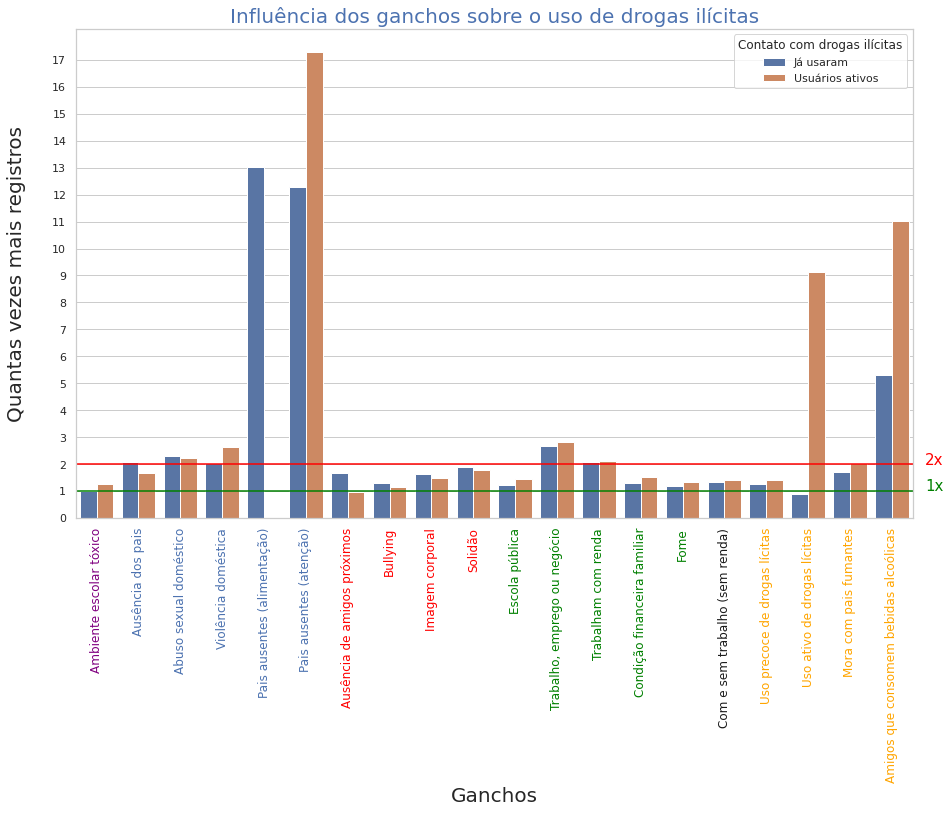

In [ ]:
#Agrupando os resultados dos ganchos
plt.figure(figsize=(15,9))
sns.barplot(data=df_conclusao, x='Título', y='Razão', hue='Tipo')
plt.xticks(Rotation=90)
plt.axhline(1, c='green')
plt.axhline(2, c='red')
plt.legend().set_title('Contato com drogas ilícitas')
plt.yticks(np.arange(0,18,1))
plt.xticks(fontsize=12)
plt.text(19.8, 1, '1x', c='green', fontsize=15)
plt.text(19.8, 2, '2x', c='red', fontsize=15)
plt.xlabel('Ganchos', fontsize=20)
plt.ylabel('Quantas vezes mais registros\n', fontsize=20)
plt.title('Influência dos ganchos sobre o uso de drogas ilícitas', fontsize=20).set_color('b')

my_colors = ['purple', 'b', 'b', 'b', 'b', 'b', 'red', 'red', 'red', 'red', 'green', 'green', 'green', 'green', 'green', 'k', 'orange', 'orange', 'orange', 'orange']

for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

plt.show()

Legenda das cores dos ganchos

- ROXO: Ambiente escolar
- AZUL: Ambiente doméstico
- VERMELHO: Auto estima
- VERDE: Condição sócio econômica
- PRETO: Enriquecimento ambiental
- LARANJA: Drogas lícitas

Conforme podemos observar no gráfico acima os maiores ganchos que levam ao uso de drogas ilícitas por crianças/adolescentes estão relacionados ao ambiente familiar. A ausência de atenção dos pais na educação está entre os maiores ganchos. O ambiente familiar conturbado com violência e abuso sexual doméstico são, também, fortes ganchos passando da linha dos 2x mais registros do que em lares equilibrados.

O contato com drogas lícitas também está entre os maiores ganchos para o uso de drogas ilícitas sendo, neste caso, os amigos, além dos familiares, os influenciadores. Além disso, aquelas crianças/adolescentes que consomem drogas lícitas são, também, bastante propensas a utilizarem drogas ilícitas.

Outro gancho que se mostrou forte foi a presença de renda. Na análise de pessoas que trabalham X que não trabalham, aquelas se mostraram mais propensas a procurar drogas ilícitas, porém para se entender se o gancho é o trabalho ou a renda, na análise das pessoas que trabalham sem renda e aquelas que não trabalham (tópico de enriquecimento ambiental), os valores de razão foram próximos de 1, o que demonstra que a renda seria o gancho e não o trabalho. Porém neste ponto fica a dúvida se a renda é um gancho ou se é o meio para se adquirir drogas. Acredito que, em um mundo em que as drogas sejam gratuitas, esse gancho de renda desapareça, não sendo, assim, considerada por mim um gancho real.

Um resultado que chamou a atenção e não foi apresentado no gráfico acima foi a alta incidência de contato com drogas ilícitas em crianças/adolescentes que sofrem ataques na escola por conta de orientação sexual (tópico 10.2). Em uma primeira análise não fazia muito sentido esse resultado em detrimento de outros tipos de bullying, porém notou-se uma possível relação indireta com a não aceitação dos pais em casa, uma vez que quase duas vezes mais crianças/adolescentes nessa situação não moram com nenhum dos pais do que as que moram com ambos, pai e mãe.

In [ ]:
#@title Conslusão do trabalho

A guerra às drogas da forma como tem sido feita há décadas está perdida. Nenhum resultado positivo foi obtido desse enfrentamento direto, muito pelo contrário, os números só pioram. Pouco se tenta entender sobre o problema e a maior parte das políticas são baseadas em achismos e preconceitos.

Estudos mais aprofundados sobre o vício e consumo de drogas, lícitas e ilícitas, deveriam ser feitos para que as políticas sejam mais efetivas. Entender o problema raiz e pensar fora da caixa, como tudo na vida, trará resultados muito mais efetivos.

Políticas de combate às drogas como as que têm sido feitas em Portugal são um exemplo de sucesso. As drogas, aqui ilícitas, foram descriminalizadas e o usuário passou a ser tratado como doente e não criminoso. Toda a verba, antes investida em policiamento, foi revertida para o tratamento dos doentes. Assistentes sociais, psicólogos e médicos são responsáveis pelos atendimentos e tratamentos desses dependentes. O resultado disso foi uma redução drástica de overdoses, de criminalidade, de encarceramento e, ao contrário do que se imagina, do consumo.

Esse tema precisa ser explorado mais a fundo e com pesquisas focadas para tal. Como explorei dados que foram obtidos com objetivos mais amplos do que os da análise, em alguns momentos os achados ficaram um pouco subjetivos. Algumas considerações empíricas, baseadas em minha experiência pessoal, podem ter tornado alguns resultados um pouco deturpados, porém pôde-se obter uma ideia boa do quadro geral. 